#INFO

###**TARIC**

**220410** - Sparkling wine with DO
* 2204 10 11 00 - **Champagne**
* 2204 10 13 00 - **Cava**
* 2204 10 15 00 - **Prosecco**

**220490** - Sparkling wine without DO

https://www.trademap.org/Country_SelProductCountry.aspx?nvpm=1%7c251%7c%7c%7c%7c2204%7c%7c%7c4%7c1%7c1%7c1%7c1%7c1%7c2%7c1%7c1%7c1

https://www.trademap.org/Country_SelProductCountry.aspx?nvpm=1%7c724%7c%7c%7c%7c2204%7c%7c%7c4%7c1%7c1%7c2%7c1%7c1%7c2%7c1%7c1%7c1

###**DATA SOURCES**

https://comercio.serviciosmin.gob.es/Datacomex/

https://wits.worldbank.org/trade/comtrade/en/country/All/year/2023/tradeflow/imports/partner/ESP/product/220410

* **TARIFFS**

https://trade.ec.europa.eu/access-to-markets/en/results?product=22041013&origin=ES&destination=AD

#**0 | IMPORTS**

* **GOOGLE COLAB**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* **LIBRARIES & PACKAGES**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")

* **DATASETS**

In [ ]:
#PATHS
    #WINE
path_wine = ''

    #POP
path_pop = ''
path_pop_2024 = ''
path_pop_u = ''
path_pop_14y = ''

    #GDP
path_gdp_20_24 = ''

    #TARIFF
path_tax = ''

    #HDI
path_hdi_20_24 = ''

    #ALC
path_alc_2024 = ''

    #GINI
path_gini = ''

    #DF MONTHLY
path_df_ = ''


In [ ]:
#WINE
df_wine = pd.read_csv(path_wine)

#POPULATION
df_pop = pd.read_csv(path_pop, skiprows=4)
df_pop_2024 = pd.read_excel(path_pop_2024)
df_pop_u = pd.read_csv(path_pop_u, skiprows=4)
df_pop_14y = pd.read_csv(path_pop_14y, skiprows=4)

#GDP CAPITA
df_gdp_20_24 = pd.read_excel(path_gdp_20_24)

#TARIFF
df_tax = pd.read_excel(path_tax)

#HDI
df_hdi_20_24 = pd.read_excel(path_hdi_20_24)

#ALCOHOL
df_alc_2024 = pd.read_excel(path_alc_2024)

#GINI
df_gini = pd.read_excel(path_gini)

#**1 | DATASET CLEANING & DATASET MERGING**

##**1.1 | SPARKLING WINE DATASET**

###**1.1.1 | DATASET PREPARATION**

The yearly data will be obtanied from the monthly dataset that was previously done. Trough a `.groupby()`, the year column will be merged.




In [ ]:
df_ = pd.read_csv(path_df_)

* **GROUPBY**

In [5]:
df_wine = df_wine.groupby(['country','TARIC','year','region','market_union'])[['EUR','TON']].sum().reset_index()

* **REDO FEATURE ENGINEERING**

In [6]:
df_wine['EUR_KG'] = round(df_wine['EUR']/df_wine['TON'],3)
df_wine['TON'] = round(df_wine['TON'],3)

* **RENAME TO ENGLISH**

In [7]:
rename_eng = {'Islas Feroë':'Faroe Islands',
              'Curaçao':'Curacao',
              'São Tomé and Príncipe':'Sao Tome and Principe'}

df_wine["country"] = df_wine["country"].replace(rename_eng)

* **DROP SPECIAL CASES**

The final step will be to drop special cases countries that would be complicated to find info, as there is no formally people living there or their consumption and population is testimonial, so does not affect the final results interpretation. This will be done based on the population dataset.

In [8]:
country_drop = ['Antarctica', 'Falkland Islands','Saint Pierre and Miquelon',
                'Vatican City','Wallis and Futuna Islands','Montserrat and Southern Grenadines',
                'Tokelau','Anguilla', 'Bonaire, Sint Eustatius, and Saba', 'Cook Island',
                'Saint Barthélemy','Gibraltar','Faroe Islands']

df_wine = df_wine[~df_wine['country'].isin(country_drop)]

###**1.1.2 | MISSING VALUES**

In [9]:
df_wine[df_wine['EUR_KG'].isna()]

,country,TARIC,year,region,market_union,EUR,TON,EUR_KG
18,Algeria,Cava,2024,North Africa,GAFTA,0.0,0.0,NaN
218,Bangladesh,Prosecco,2022,South Asia,None / Other,0.0,0.0,NaN
280,Benin,Cava,2022,Sub-Saharan Africa,ECOWAS,0.0,0.0,NaN
838,Ethiopia,Cava,2021,Sub-Saharan Africa,None / Other,0.0,0.0,NaN
1088,Guyana,Champagne,2020,South America,Mercosur & associated members,0.0,0.0,NaN
1704,Myanmar,Cava,2021,Southeast Asia,ASEAN,0.0,0.0,NaN


##**1.2 | POPULATION DATASET**

###**1.2.1 | 2020-2023**

In [10]:
df_pop = df_pop[['Country Name','2020','2021','2022','2023']]

df_pop = df_pop.melt(id_vars=['Country Name'],
                 value_vars=['2020', '2021', '2022', '2023'],
                 var_name='year', value_name='population')

df_pop['country'] = df_pop['Country Name']
df_pop = df_pop.drop(columns=['Country Name'])

* **DICTIONARY TO ADAPT NAMES**

In [11]:
country_mapping = {
    "DR Congo": "Democratic Republic of the Congo",
    "Côte d'Ivoire": "Ivory Coast",
    "Czech Republic (Czechia)": "Czech Republic",
    "Hong Kong": "Hong Kong (China)",
    "State of Palestine": "Palestine",
    "Macao": "Macao (China)",
    "Timor-Leste": "East Timor",
    "Cabo Verde": "Cape Verde",
    "Faeroe Islands": "Islas Feroë",
    "Turks and Caicos": "Turks and Caicos Islands",
    "Saint Barthelemy": "Saint Barthélemy",
    "St. Vincent & Grenadines": "Saint Vincent and the Grenadines",
    "Saint Kitts & Nevis": "Saint Kitts and Nevis",
    "Saint Pierre & Miquelon": "Saint Pierre and Miquelon",
    "U.S. Virgin Islands": "United States Virgin Islands",
    "British Virgin Islands": "British Virgin Islands",
    "Sint Maarten": "Saint Martin",
    "Wallis & Futuna": "Wallis and Futuna Islands",
    "Cook Islands": "Cook Island",
    "Kosovo": "Kosovo (Serbia)",

    'China':'China (Mainland)',
    'Hong Kong SAR, China':'Hong Kong (China)',
    'Macao SAR, China':'Macao (China)',
    'Egypt, Arab Rep.':'Egypt',
    'Bahamas, The':'Bahamas',
    'Syrian Arab Republic':'Syria',
    'Turkiye':'Turkey',
    'Venezuela, RB':'Venezuela',
    'Viet Nam':'Vietnam',
    'Russian Federation':'Russia',
    'Congo, Dem. Rep.':'Democratic Republic of the Congo',
    'Congo, Rep.':'Congo',
    "Cote d'Ivoire":'Ivory Coast',

    'Czechia':'Czech Republic',
    'Iran, Islamic Rep.':'Iran',
    "Korea, Dem. People's Rep.":'North Korea',
    'Korea, Rep.':'South Korea',
    'Kyrgyz Republic':'Kyrgyzstan',
    'Lao PDR':'Laos',
    'Slovak Republic':'Slovakia',
    'Suriname':'Surinam',
    'Gambia, The':'Gambia',
    'St. Kitts and Nevis':'Saint Kitts and Nevis',
    'St. Lucia':'Saint Lucia',
    'St. Martin (French part)':'Saint Martin',
    'St. Vincent and the Grenadines':'Saint Vincent and the Grenadines',
    'Bosnia and Herzegovina':'Bosnia-Herzegovina',
    'Brunei Darussalam':'Brunei',
    'Virgin Islands (U.S.)':'United States Virgin Islands',
    'Yemen, Rep.':'Yemen',
    'West Bank and Gaza':'Palestine'
}

In [12]:
df_pop["country"] = df_pop["country"].replace(country_mapping)

In [13]:
set(df_wine['country'].unique())-set(df_pop['country'].unique())

{'Taiwan (China)'}

* **ADDING TAIWAN (CHINA)**

In [14]:
taiwan_pop = pd.DataFrame({"country":"Taiwan (China)",
                          "year": [2020, 2021, 2022, 2023],
                          "population": [23561236, 23452297, 23264640, 23424442]})

df_pop = pd.concat([df_pop, taiwan_pop], ignore_index=True)

In [15]:
df_pop.tail(10)

,year,population,country
1058,2023,216663.0,Samoa
1059,2023,1756366.0,Kosovo (Serbia)
1060,2023,39390799.0,Yemen
1061,2023,63212384.0,South Africa
1062,2023,20723965.0,Zambia
1063,2023,16340822.0,Zimbabwe
1064,2020,23561236.0,Taiwan (China)
1065,2021,23452297.0,Taiwan (China)
1066,2022,23264640.0,Taiwan (China)
1067,2023,23424442.0,Taiwan (China)


###**1.2.2 | 2024**

In [16]:
df_pop_2024['country'] = df_pop_2024['Unnamed: 0']
df_pop_2024 = df_pop_2024.drop(columns=['Unnamed: 0'])

In [17]:
df_pop_2024 = df_pop_2024.melt(id_vars=['country'],
                 value_vars=2024,
                 var_name='year', value_name='population')

In [18]:
country_mapping_24 = {
 'Bosnia and Herzegovina':'Bosnia-Herzegovina',
 'Cabo Verde':'Cape Verde',
 'China':'China (Mainland)',
 'Curaçao':'Curacao',
 'Czech Republic (Czechia)':'Czech Republic',
 'DR Congo':'Democratic Republic of the Congo',
 'Timor-Leste':'East Timor',
 'Faeroe Islands':'Faroe Islands',
 'Hong Kong':'Hong Kong (China)',
 "Côte d'Ivoire":'Ivory Coast',
 'Macao':'Macao (China)',
 'State of Palestine':'Palestine',
 'Saint Kitts & Nevis':'Saint Kitts and Nevis',
 'St. Vincent & Grenadines':'Saint Vincent and the Grenadines',
 'Sao Tome & Principe':'Sao Tome and Principe',
 'Suriname':'Surinam',
 'Taiwan':'Taiwan (China)',
 'Turks and Caicos':'Turks and Caicos Islands',
 'U.S. Virgin Islands':'United States Virgin Islands'
}

In [19]:
df_pop_2024["country"] = df_pop_2024["country"].replace(country_mapping_24)

In [20]:
kosovo_pop = pd.DataFrame({"country":["Kosovo (Serbia)"],
                          "year": [2024],
                          "population":[1756366]})

df_pop_2024 = pd.concat([df_pop_2024, kosovo_pop],ignore_index=True)

In [21]:
set(df_pop_2024['country'].unique())-set(df_wine['country'].unique())

{'American Samoa',
 'Anguilla',
 'Caribbean Netherlands',
 'Cook Islands',
 'Eswatini',
 'Falkland Islands',
 'Faroe Islands',
 'French Guiana',
 'Gibraltar',
 'Guadeloupe',
 'Holy See',
 'Isle of Man',
 'Kiribati',
 'Lesotho',
 'Malawi',
 'Martinique',
 'Mayotte',
 'Micronesia',
 'Monaco',
 'Montserrat',
 'Nauru',
 'Niue',
 'Northern Mariana Islands',
 'Palau',
 'Puerto Rico',
 'Réunion',
 'Saint Barthelemy',
 'Saint Helena',
 'Saint Pierre & Miquelon',
 'Samoa',
 'Sint Maarten',
 'Solomon Islands',
 'Tokelau',
 'Tonga',
 'Wallis & Futuna',
 'Western Sahara'}

In [22]:
set(df_wine['country'].unique())-set(df_pop_2024['country'].unique())

set()

In [23]:
df_pop_2024.tail(10)

,country,year,population
225,Saint Barthelemy,2024,11258
226,Tuvalu,2024,9646
227,Saint Pierre & Miquelon,2024,5628
228,Saint Helena,2024,5237
229,Montserrat,2024,4389
230,Falkland Islands,2024,3470
231,Tokelau,2024,2506
232,Niue,2024,1819
233,Holy See,2024,496
234,Kosovo (Serbia),2024,1756366


* **DATASET CONCAT**

###**1.2.3 | CONCAT**

In [24]:
df_pop = pd.concat([df_pop, df_pop_2024], ignore_index=True)

In [25]:
df_pop[df_pop['country'] == 'Kosovo (Serbia)']

,year,population,country
261,2020,1790152.0,Kosovo (Serbia)
527,2021,1786080.0,Kosovo (Serbia)
793,2022,1768096.0,Kosovo (Serbia)
1059,2023,1756366.0,Kosovo (Serbia)
1302,2024,1756366.0,Kosovo (Serbia)


In [26]:
df_pop['year'] = df_pop['year'].astype('int')

##**1.3 | GDP CAPITA**

###**1.3.1 | MAPPING**

In [27]:
country_mapping_gdp_cap = {
    "DR Congo": "Democratic Republic of the Congo",
    "Côte d'Ivoire": "Ivory Coast",
    "Czech Republic (Czechia)": "Czech Republic",
    "State of Palestine": "Palestine",
    "Timor-Leste": "East Timor",
    "Cabo Verde": "Cape Verde",
    "Faeroe Islands": "Islas Feroë",
    "Turks and Caicos": "Turks and Caicos Islands",
    "Saint Barthelemy": "Saint Barthélemy",
    "St. Vincent & Grenadines": "Saint Vincent and the Grenadines",
    "Saint Kitts & Nevis": "Saint Kitts and Nevis",
    "Saint Pierre & Miquelon": "Saint Pierre and Miquelon",
    "U.S. Virgin Islands": "United States Virgin Islands",
    "British Virgin Islands": "British Virgin Islands",
    "Sint Maarten": "Saint Martin",
    "Wallis & Futuna": "Wallis and Futuna Islands",
    "Cook Islands": "Cook Island",
    "Kosovo": "Kosovo (Serbia)",

    "China, People's Republic of":'China (Mainland)',
    'Hong Kong SAR':'Hong Kong (China)',
    'Macao SAR':'Macao (China)',
    'Taiwan Province of China':'Taiwan (China)',
    'Egypt, Arab Rep.':'Egypt',
    'Bahamas, The':'Bahamas',
    'Syrian Arab Republic':'Syria',
    'Türkiye, Republic of':'Turkey',
    'Venezuela, RB':'Venezuela',
    'Viet Nam':'Vietnam',
    'Russian Federation':'Russia',
    'Congo, Dem. Rep. of the':'Democratic Republic of the Congo',
    'Congo, Republic of ':'Congo',
    "Cote d'Ivoire":'Ivory Coast',

    'Czechia':'Czech Republic',
    'Iran, Islamic Rep.':'Iran',
    "Korea, Dem. People's Rep.":'North Korea',
    'Korea, Republic of':'South Korea',
    'Kyrgyz Republic':'Kyrgyzstan',
    'Lao P.D.R.':'Laos',
    'Slovak Republic':'Slovakia',
    'Suriname':'Surinam',
    'Gambia, The':'Gambia',
    'St. Kitts and Nevis':'Saint Kitts and Nevis',
    'St. Lucia':'Saint Lucia',
    'St. Martin (French part)':'Saint Martin',
    'St. Vincent and the Grenadines':'Saint Vincent and the Grenadines',
    'Bosnia and Herzegovina':'Bosnia-Herzegovina',
    'Brunei Darussalam':'Brunei',
    'Virgin Islands (U.S.)':'United States Virgin Islands',
    'Yemen, Rep.':'Yemen',
    'West Bank and Gaza':'Palestine',
    'South Sudan, Republic of':'South Sudan',
    'São Tomé and Príncipe':'Sao Tome and Principe',
    'North Macedonia ':'North Macedonia'
}

###**1.3.2 | 2020-2024 GDP CAPITA - IFM**

In [28]:
df_gdp_20_24['country'] = df_gdp_20_24['GDP per capita, current prices\n (U.S. dollars per capita)']
df_gdp_20_24 = df_gdp_20_24.drop(columns=['GDP per capita, current prices\n (U.S. dollars per capita)'])

----

In [29]:
df_gdp_20_24 = df_gdp_20_24[['country',2020,2021,2022,2023,2024]]

df_gdp_20_24 = df_gdp_20_24.melt(id_vars=['country'],
                 value_vars=[2020,2021,2022,2023,2024],
                 var_name='year', value_name='gdp_capita')

In [30]:
df_gdp_20_24["country"] = df_gdp_20_24["country"].replace(country_mapping_gdp_cap)

###**1.3.3 | ADDING MISSING COUNTRIES**

The remaining countries will be included based on other sources available on the internet and predictions for the missing values.

In [31]:
missing_country_gdp = pd.DataFrame([
    #Bermuda
    {"country": "Bermuda", "year": 2020, "gdp_capita": 106973.2},
    {"country": "Bermuda", "year": 2021, "gdp_capita": 112712},
    {"country": "Bermuda", "year": 2022, "gdp_capita": 120897.3},
    {"country": "Bermuda", "year": 2023, "gdp_capita": 125841.6},
    {"country": "Bermuda", "year": 2024, "gdp_capita": 132946.56},
    #British Virgin Islands
    {"country": "British Virgin Islands", "year": 2020, "gdp_capita": 34246},
    {"country": "British Virgin Islands", "year": 2021, "gdp_capita": 34246},
    {"country": "British Virgin Islands", "year": 2022, "gdp_capita": 34246},
    {"country": "British Virgin Islands", "year": 2023, "gdp_capita": 34246},
    {"country": "British Virgin Islands", "year": 2024, "gdp_capita": 34246},
    #Cayman Islands
    {"country": "Cayman Islands", "year": 2020, "gdp_capita": 82338.8},
    {"country": "Cayman Islands", "year": 2021, "gdp_capita": 86438.1},
    {"country": "Cayman Islands", "year": 2022, "gdp_capita": 92202.1},
    {"country": "Cayman Islands", "year": 2023, "gdp_capita": 97749.5},
    {"country": "Cayman Islands", "year": 2024, "gdp_capita": 103614.47},
    #Cuba
    {"country": "Cuba", "year": 2020, "gdp_capita": 9605.3},
    {"country": "Cuba", "year": 2021, "gdp_capita": 9943.46},
    {"country": "Cuba", "year": 2022, "gdp_capita": 10290.36},
    {"country": "Cuba", "year": 2023, "gdp_capita": 10637.25},
    {"country": "Cuba", "year": 2024, "gdp_capita": 10984.15},
    #Curacao
    {"country": "Curacao", "year": 2020, "gdp_capita": 16356.98},
    {"country": "Curacao", "year": 2021, "gdp_capita": 17980.09},
    {"country": "Curacao", "year": 2022, "gdp_capita": 20501.75},
    {"country": "Curacao", "year": 2023, "gdp_capita": 22192.45},
    {"country": "Curacao", "year": 2024, "gdp_capita": 24264.83},
    #French Polynesia
    {"country": "French Polynesia", "year": 2020, "gdp_capita": 20746.27},
    {"country": "French Polynesia", "year": 2021, "gdp_capita": 21982.90},
    {"country": "French Polynesia", "year": 2022, "gdp_capita": 20738.65},
    {"country": "French Polynesia", "year": 2023, "gdp_capita": 21148.32},
    {"country": "French Polynesia", "year": 2024, "gdp_capita": 21144.51},
    #Greenland
    {"country": "Greenland", "year": 2020, "gdp_capita": 54693.08},
    {"country": "Greenland", "year": 2021, "gdp_capita": 57116.3},
    {"country": "Greenland", "year": 2022, "gdp_capita": 59539.52},
    {"country": "Greenland", "year": 2023, "gdp_capita": 61962.74},
    {"country": "Greenland", "year": 2024, "gdp_capita": 64385.96},
    #Guam
    {"country": "Guam", "year": 2020, "gdp_capita": 36482.94},
    {"country": "Guam", "year": 2021, "gdp_capita": 38074.88},
    {"country": "Guam", "year": 2022, "gdp_capita": 41833.15},
    {"country": "Guam", "year": 2023, "gdp_capita": 44508.26},
    {"country": "Guam", "year": 2024, "gdp_capita": 47183.37},
    #Liechtenstein
    {"country": "Liechtenstein", "year": 2020, "gdp_capita": 164671.09},
    {"country": "Liechtenstein", "year": 2021, "gdp_capita": 196783.73},
    {"country": "Liechtenstein", "year": 2022, "gdp_capita": 186400.23},
    {"country": "Liechtenstein", "year": 2023, "gdp_capita": 190128.23},
    {"country": "Liechtenstein", "year": 2024, "gdp_capita": 193930.79},
    #New Caledonia
    {"country": "New Caledonia", "year": 2020, "gdp_capita": 33270.33},
    {"country": "New Caledonia", "year": 2021, "gdp_capita": 35311.55},
    {"country": "New Caledonia", "year": 2022, "gdp_capita": 33516.36},
    {"country": "New Caledonia", "year": 2023, "gdp_capita": 34019.11},
    {"country": "New Caledonia", "year": 2024, "gdp_capita": 34529.40},
    #North Korea
    {"country": "North Korea", "year": 2020, "gdp_capita": 4500},
    {"country": "North Korea", "year": 2021, "gdp_capita": 4500},
    {"country": "North Korea", "year": 2022, "gdp_capita": 4500},
    {"country": "North Korea", "year": 2023, "gdp_capita": 4525},
    {"country": "North Korea", "year": 2024, "gdp_capita": 4550},
    #Saint Martin
    {"country": "Saint Martin", "year": 2020, "gdp_capita": 30150.90},
    {"country": "Saint Martin", "year": 2021, "gdp_capita": 32548.44},
    {"country": "Saint Martin", "year": 2022, "gdp_capita": 36476.63},
    {"country": "Saint Martin", "year": 2023, "gdp_capita": 38077.54},
    {"country": "Saint Martin", "year": 2024, "gdp_capita": 39752.95},
    #Turks and Caicos Islands
    {"country": "Turks and Caicos Islands", "year": 2020, "gdp_capita": 17452.66},
    {"country": "Turks and Caicos Islands", "year": 2021, "gdp_capita": 23114.79},
    {"country": "Turks and Caicos Islands", "year": 2022, "gdp_capita": 26802.07},
    {"country": "Turks and Caicos Islands", "year": 2023, "gdp_capita": 30348.81},
    {"country": "Turks and Caicos Islands", "year": 2024, "gdp_capita": 34354.85},
    #United States Virgin Islands
    {"country": "United States Virgin Islands", "year": 2020, "gdp_capita": 39787.37},
    {"country": "United States Virgin Islands", "year": 2021, "gdp_capita": 42571.08},
    {"country": "United States Virgin Islands", "year": 2022, "gdp_capita": 44320.91},
    {"country": "United States Virgin Islands", "year": 2023, "gdp_capita": 46138.87},
    {"country": "United States Virgin Islands", "year": 2024, "gdp_capita": 48030.56},
])
df_gdp_20_24 = pd.concat([df_gdp_20_24, missing_country_gdp], ignore_index=True)

In [32]:
set(df_wine['country'])-set(df_gdp_20_24['country'])

set()

##**1.4 | HDI**

###**1.4.1 | MAPPING**

In [33]:
country_mapping_hdi = {
 'Bosnia and Herzegovina':'Bosnia-Herzegovina',
 'Cabo Verde':'Cape Verde',
 'China':'China (Mainland)',
 'Republic of the Congo':'Congo',
 'Czechia':'Czech Republic',
 'Timor-Leste':'East Timor',
 'The Gambia':'Gambia',
 'Hong Kong':'Hong Kong (China)',
 "Côte d'Ivoire":'Ivory Coast',
 'State of Palestine':'Palestine',
 'Suriname':'Surinam',
 'Türkiye':'Turkey',
 'Viet Nam':'Vietnam'
}

###**1.4.2 | 2020-2024 DATASET**

* **DATASET PREPARATION**

In [34]:
df_hdi_20_24 = df_hdi_20_24[['country',2020,2021,2022,2023,2024]]

df_hdi_20_24 = df_hdi_20_24.melt(id_vars=['country'],
                 value_vars=[2020,2021,2022,2023,2024],
                 var_name='year', value_name='hdi')

In [35]:
df_hdi_20_24['hdi'] = round(df_hdi_20_24['hdi'],3)

In [36]:
df_hdi_20_24["country"] = df_hdi_20_24["country"].replace(country_mapping_hdi)

In [37]:
set(df_wine["country"])-set(df_hdi_20_24["country"])

{'Aruba',
 'Bermuda',
 'British Virgin Islands',
 'Cayman Islands',
 'Curacao',
 'French Polynesia',
 'Greenland',
 'Guam',
 'Kosovo (Serbia)',
 'Macao (China)',
 'New Caledonia',
 'North Korea',
 'Saint Martin',
 'Somalia',
 'Taiwan (China)',
 'Turks and Caicos Islands',
 'United States Virgin Islands'}

###**1.4.3 | ADDING MISSING COUNTRIES**

In [38]:
missing_country_hdi = pd.DataFrame([
    #Aruba
    {"country": "Aruba", "year": 2020, "hdi": 0.903},
    {"country": "Aruba", "year": 2021, "hdi": 0.901},
    {"country": "Aruba", "year": 2022, "hdi": 0.902},
    {"country": "Aruba", "year": 2023, "hdi": 0.901},
    {"country": "Aruba", "year": 2024, "hdi": 0.901},

    #Bermuda
    {"country": "Bermuda", "year": 2020, "hdi": 0.929},
    {"country": "Bermuda", "year": 2021, "hdi": 0.927},
    {"country": "Bermuda", "year": 2022, "hdi": 0.928},
    {"country": "Bermuda", "year": 2023, "hdi": 0.928},
    {"country": "Bermuda", "year": 2024, "hdi": 0.927},

    #British Virgin Islands
    {"country": "British Virgin Islands", "year": 2020, "hdi": 0.890},
    {"country": "British Virgin Islands", "year": 2021, "hdi": 0.888},
    {"country": "British Virgin Islands", "year": 2022, "hdi": 0.889},
    {"country": "British Virgin Islands", "year": 2023, "hdi": 0.888},
    {"country": "British Virgin Islands", "year": 2024, "hdi": 0.888},

    #Cayman Islands
    {"country": "Cayman Islands", "year": 2020, "hdi": 0.925},
    {"country": "Cayman Islands", "year": 2021, "hdi": 0.923},
    {"country": "Cayman Islands", "year": 2022, "hdi": 0.924},
    {"country": "Cayman Islands", "year": 2023, "hdi": 0.924},
    {"country": "Cayman Islands", "year": 2024, "hdi": 0.923},

    #Curacao
    {"country": "Curacao", "year": 2020, "hdi": 0.863},
    {"country": "Curacao", "year": 2021, "hdi": 0.861},
    {"country": "Curacao", "year": 2022, "hdi": 0.862},
    {"country": "Curacao", "year": 2023, "hdi": 0.861},
    {"country": "Curacao", "year": 2024, "hdi": 0.861},

    #French Polynesia
    {"country": "French Polynesia", "year": 2020, "hdi": 0.890},
    {"country": "French Polynesia", "year": 2021, "hdi": 0.888},
    {"country": "French Polynesia", "year": 2022, "hdi": 0.889},
    {"country": "French Polynesia", "year": 2023, "hdi": 0.888},
    {"country": "French Polynesia", "year": 2024, "hdi": 0.888},

    #Greenland
    {"country": "Greenland", "year": 2020, "hdi": 0.901},
    {"country": "Greenland", "year": 2021, "hdi": 0.899},
    {"country": "Greenland", "year": 2022, "hdi": 0.900},
    {"country": "Greenland", "year": 2023, "hdi": 0.899},
    {"country": "Greenland", "year": 2024, "hdi": 0.899},

    #Guam
    {"country": "Guam", "year": 2020, "hdi": 0.890},
    {"country": "Guam", "year": 2021, "hdi": 0.888},
    {"country": "Guam", "year": 2022, "hdi": 0.889},
    {"country": "Guam", "year": 2023, "hdi": 0.888},
    {"country": "Guam", "year": 2024, "hdi": 0.888},

    #Kosovo (Serbia)
    {"country": "Kosovo (Serbia)", "year": 2020, "hdi": 0.762},
    {"country": "Kosovo (Serbia)", "year": 2021, "hdi": 0.760},
    {"country": "Kosovo (Serbia)", "year": 2022, "hdi": 0.761},
    {"country": "Kosovo (Serbia)", "year": 2023, "hdi": 0.760},
    {"country": "Kosovo (Serbia)", "year": 2024, "hdi": 0.760},

    #Macao (China)
    {"country": "Macao (China)", "year": 2020, "hdi": 0.940},
    {"country": "Macao (China)", "year": 2021, "hdi": 0.938},
    {"country": "Macao (China)", "year": 2022, "hdi": 0.939},
    {"country": "Macao (China)", "year": 2023, "hdi": 0.939},
    {"country": "Macao (China)", "year": 2024, "hdi": 0.938},

    #New Caledonia
    {"country": "New Caledonia", "year": 2020, "hdi": 0.890},
    {"country": "New Caledonia", "year": 2021, "hdi": 0.888},
    {"country": "New Caledonia", "year": 2022, "hdi": 0.889},
    {"country": "New Caledonia", "year": 2023, "hdi": 0.888},
    {"country": "New Caledonia", "year": 2024, "hdi": 0.888},

    #North Korea
    {"country": "North Korea", "year": 2020, "hdi": 0.650},
    {"country": "North Korea", "year": 2021, "hdi": 0.645},
    {"country": "North Korea", "year": 2022, "hdi": 0.648},
    {"country": "North Korea", "year": 2023, "hdi": 0.647},
    {"country": "North Korea", "year": 2024, "hdi": 0.646},

    #Saint Martin
    {"country": "Saint Martin", "year": 2020, "hdi": 0.850},
    {"country": "Saint Martin", "year": 2021, "hdi": 0.848},
    {"country": "Saint Martin", "year": 2022, "hdi": 0.849},
    {"country": "Saint Martin", "year": 2023, "hdi": 0.848},
    {"country": "Saint Martin", "year": 2024, "hdi": 0.848},

    #Somalia
    {"country": "Somalia", "year": 2020, "hdi": 0.361},
    {"country": "Somalia", "year": 2021, "hdi": 0.359},
    {"country": "Somalia", "year": 2022, "hdi": 0.360},
    {"country": "Somalia", "year": 2023, "hdi": 0.359},
    {"country": "Somalia", "year": 2024, "hdi": 0.359},

    #Taiwan (China)
    {"country": "Taiwan (China)", "year": 2020, "hdi": 0.916},
    {"country": "Taiwan (China)", "year": 2021, "hdi": 0.914},
    {"country": "Taiwan (China)", "year": 2022, "hdi": 0.915},
    {"country": "Taiwan (China)", "year": 2023, "hdi": 0.915},
    {"country": "Taiwan (China)", "year": 2024, "hdi": 0.914},

    #Turks and Caicos Islands
    {"country": "Turks and Caicos Islands", "year": 2020, "hdi": 0.850},
    {"country": "Turks and Caicos Islands", "year": 2021, "hdi": 0.848},
    {"country": "Turks and Caicos Islands", "year": 2022, "hdi": 0.849},
    {"country": "Turks and Caicos Islands", "year": 2023, "hdi": 0.848},
    {"country": "Turks and Caicos Islands", "year": 2024, "hdi": 0.848},

    #'United States Virgin Islands'
    {"country": "United States Virgin Islands", "year": 2020, "hdi": 0.892},
    {"country": "United States Virgin Islands", "year": 2021, "hdi": 0.890},
    {"country": "United States Virgin Islands", "year": 2022, "hdi": 0.891},
    {"country": "United States Virgin Islands", "year": 2023, "hdi": 0.890},
    {"country": "United States Virgin Islands", "year": 2024, "hdi": 0.890},
])

df_hdi_20_24 = pd.concat([df_hdi_20_24, missing_country_hdi], ignore_index=True)

##**1.5 | ALCOHOL TARIFF**

###**1.5.1 | DICTIONARY**

In [39]:
country_mapping_tax = {
 'Bolivia, Plurinational State of':'Bolivia',
 'Bonaire, Sint Eustatius and Saba':'Bonaire, Sint Eustatius, and Saba',
 'Bosnia and Herzegovina':'Bosnia-Herzegovina',
 'Brunei Darussalam':'Brunei',
 'Cabo Verde':'Cape Verde',
 'China':'China (Mainland)',
 "Côte d'Ivoire":'Cook Island',
 'Congo, Democratic Republic of the':'Democratic Republic of the Congo',
 'Curaçao':'Curacao',
 'Timor-Leste':'East Timor',
 'Falkland Islands (Malvinas)':'Falkland Islands',
 'Hong Kong, China':'Hong Kong (China)',
 'Iran, Islamic Republic of':'Iran',
  "Lao People's Democratic Republic":'Laos',
 'Libya, State of':'Libya',
 'Macao, China':'Macao (China)',
 'Moldova, Republic of':'Moldova',
 'Montserrat':'Montserrat and Southern Grenadines',
 "Korea, Democratic People's Republic of":'North Korea',
 'Macedonia, North':'North Macedonia',
 'Russian Federation':'Russia',
 'Sint Maarten (Dutch part)':'Saint Martin',
 'Korea, Republic of':'South Korea',
 'Suriname':'Surinam',
 'Syrian Arab Republic':'Syria',
 'Taipei, Chinese':'Taiwan (China)',
 'Tanzania, United Republic of':'Tanzania',
 'Türkiye':'Turkey',
 'United States of America':'United States',
 'Venezuela, Bolivarian Republic of':'Venezuela',
 'Viet Nam':'Vietnam',
}

###**1.5.2 | COUNTRY DATA**

In [40]:
df_tax['tariff'] = df_tax['Average tariff faced by Spain (%)']
del(df_tax['Average tariff faced by Spain (%)'] )

In [41]:
df_tax["country"] = df_tax["country"].replace(country_mapping_tax)

###**1.5.3 | MISSING COUNTRIES**

In [42]:
set(df_wine['country'].unique())-set(df_tax['country'].unique())

{'Guam',
 'Ivory Coast',
 'Kosovo (Serbia)',
 'Kuwait',
 'Liechtenstein',
 'Palestine',
 'San Marino',
 'Saudi Arabia',
 'Spain',
 'United States Virgin Islands',
 'Yemen'}

In [43]:
df_tax_ = pd.DataFrame({
    'country': ['Guam', 'Ivory Coast', 'Kosovo (Serbia)', 'Kuwait', 'Liechtenstein',
                'Palestine', 'San Marino', 'Saudi Arabia', 'Spain',
                'United States Virgin Islands', 'Yemen'],
    'tariff': [2.7, 20, 0, 100, 0, 0, 0, 9999, 0, 2.7, 9999]
})

In [44]:
df_tax = pd.concat([df_tax, df_tax_], ignore_index=True)

###**1.5.4 | VALUE AMMENDS**

There are some countries that its tariff values are not shown in the list. In those cases, first we will check which of them appear on `df_wine` and figure out those country values.

In [45]:
set(df_tax[(df_tax['tariff'].isna())]['country'].unique())&(set(df_wine['country']))

{'Afghanistan',
 'Andorra',
 'Bahrain',
 'Bangladesh',
 'British Virgin Islands',
 'Curacao',
 'Greenland',
 'Iraq',
 'Marshall Islands',
 'New Caledonia',
 'North Korea',
 'Qatar',
 'Saint Martin',
 'Somalia',
 'South Sudan',
 'Sudan',
 'Turkmenistan',
 'Turks and Caicos Islands'}

In [46]:
dict_tax={
 'Afghanistan':9999,
 'Andorra':12.35,
 'Bahrain':125,
 'Bangladesh':25,
 'British Virgin Islands':12.5,  #input value
 'Curacao':12.5,  #input value
 'Greenland':64.8, #aprox. 72.5DKK per litre
 'Iraq':30,
 'Marshall Islands':12.5,  #input value
 'New Caledonia':0,
 'North Korea':9999,
 'Qatar':100,
 'Saint Martin':12.5,  #input value
 'Somalia':40, #aprox. taken from Sudan
 'South Sudan':40, #aprox. taken from Sudan
 'Sudan':40,
 'Turkmenistan':2,
 'Turks and Caicos Islands':12.5,  #input value
}

In [47]:
df_tax['tariff'] = df_tax['tariff'].fillna(df_tax['country'].map(dict_tax))

In [48]:
df_tax[df_tax['country'] == 'Jordan']

,country,tariff
127,Jordan,51.5


##**1.6 | ALCOHOL COMPSUMPTION PER CAPITA**

###**1.6.1 | DICTIONARY**

In [49]:
country_mapping_alc = {
 'Bosnia and Herzegovina':'Bosnia-Herzegovina',
 'China':'China (Mainland)',
 'DR Congo':'Democratic Republic of the Congo',
 'Timor-Leste':'East Timor',
 'Micronesia':'Marshall Islands',
 'São Tomé and Príncipe':'Sao Tome and Principe',
}

###**1.6.2 | DATASET**

In [50]:
df_alcohol = df_alc_2024[['country',2020,2021,2022,2023,2024]]

In [51]:
df_alcohol = df_alcohol.melt(id_vars=['country'],
                 value_vars=[2020,2021,2022,2023,2024],
                 var_name='year', value_name='l_alc')

df_alcohol['l_alc'] = round(df_alcohol['l_alc'],4)

In [52]:
df_alcohol['country'] = df_alcohol['country'].str.strip()

###**1.6.3 | MISSING COUNTRIES**

In [53]:
df_alcohol["country"] = df_alcohol["country"].replace(country_mapping_alc)

In [54]:
set(df_wine['country'])-set(df_alcohol['country'])

{'Aruba',
 'Bermuda',
 'British Virgin Islands',
 'Cayman Islands',
 'Curacao',
 'French Polynesia',
 'Greenland',
 'Guam',
 'Hong Kong (China)',
 'Kosovo (Serbia)',
 'Liechtenstein',
 'Macao (China)',
 'New Caledonia',
 'Palestine',
 'Saint Martin',
 'San Marino',
 'South Sudan',
 'Surinam',
 'Taiwan (China)',
 'Turks and Caicos Islands',
 'United States Virgin Islands'}

In [55]:
missing_country_alc = pd.DataFrame([
    # Aruba (consumo de alcohol)
    {"country": "Aruba", "year": 2020, "l_alc": 8.0},  # Estimado basado en tendencias del Caribe
    {"country": "Aruba", "year": 2021, "l_alc": 8.0},
    {"country": "Aruba", "year": 2022, "l_alc": 8.0},
    {"country": "Aruba", "year": 2023, "l_alc": 8.0},
    {"country": "Aruba", "year": 2024, "l_alc": 8.0},

    # Bermuda (consumo de alcohol)
    {"country": "Bermuda", "year": 2020, "l_alc": 7.5},  # Estimado basado en tendencias del Caribe
    {"country": "Bermuda", "year": 2021, "l_alc": 7.5},
    {"country": "Bermuda", "year": 2022, "l_alc": 7.5},
    {"country": "Bermuda", "year": 2023, "l_alc": 7.5},
    {"country": "Bermuda", "year": 2024, "l_alc": 7.5},

    # British Virgin Islands (consumo de alcohol)
    {"country": "British Virgin Islands", "year": 2020, "l_alc": 7.0},  # Estimado basado en tendencias del Caribe
    {"country": "British Virgin Islands", "year": 2021, "l_alc": 7.0},
    {"country": "British Virgin Islands", "year": 2022, "l_alc": 7.0},
    {"country": "British Virgin Islands", "year": 2023, "l_alc": 7.0},
    {"country": "British Virgin Islands", "year": 2024, "l_alc": 7.0},

    # Cayman Islands (consumo de alcohol)
    {"country": "Cayman Islands", "year": 2020, "l_alc": 7.2},  # Estimado basado en tendencias del Caribe
    {"country": "Cayman Islands", "year": 2021, "l_alc": 7.2},
    {"country": "Cayman Islands", "year": 2022, "l_alc": 7.2},
    {"country": "Cayman Islands", "year": 2023, "l_alc": 7.2},
    {"country": "Cayman Islands", "year": 2024, "l_alc": 7.2},

    # Curacao (consumo de alcohol)
    {"country": "Curacao", "year": 2020, "l_alc": 8.5},  # Estimado basado en tendencias del Caribe
    {"country": "Curacao", "year": 2021, "l_alc": 8.5},
    {"country": "Curacao", "year": 2022, "l_alc": 8.5},
    {"country": "Curacao", "year": 2023, "l_alc": 8.5},
    {"country": "Curacao", "year": 2024, "l_alc": 8.5},

    # French Polynesia (consumo de alcohol)
    {"country": "French Polynesia", "year": 2020, "l_alc": 6.0},  # Estimado basado en tendencias de Oceanía
    {"country": "French Polynesia", "year": 2021, "l_alc": 6.0},
    {"country": "French Polynesia", "year": 2022, "l_alc": 6.0},
    {"country": "French Polynesia", "year": 2023, "l_alc": 6.0},
    {"country": "French Polynesia", "year": 2024, "l_alc": 6.0},

    # Greenland (consumo de alcohol)
    {"country": "Greenland", "year": 2020, "l_alc": 10.0},  # Basado en datos de Dinamarca
    {"country": "Greenland", "year": 2021, "l_alc": 10.0},
    {"country": "Greenland", "year": 2022, "l_alc": 10.0},
    {"country": "Greenland", "year": 2023, "l_alc": 10.0},
    {"country": "Greenland", "year": 2024, "l_alc": 10.0},

    # Guam (consumo de alcohol)
    {"country": "Guam", "year": 2020, "l_alc": 7.0},  # Estimado basado en tendencias de EE.UU.
    {"country": "Guam", "year": 2021, "l_alc": 7.0},
    {"country": "Guam", "year": 2022, "l_alc": 7.0},
    {"country": "Guam", "year": 2023, "l_alc": 7.0},
    {"country": "Guam", "year": 2024, "l_alc": 7.0},

    # Hong Kong (China) (consumo de alcohol)
    {"country": "Hong Kong (China)", "year": 2020, "l_alc": 2.5},  # Basado en datos de la OMS
    {"country": "Hong Kong (China)", "year": 2021, "l_alc": 2.5},
    {"country": "Hong Kong (China)", "year": 2022, "l_alc": 2.5},
    {"country": "Hong Kong (China)", "year": 2023, "l_alc": 2.5},
    {"country": "Hong Kong (China)", "year": 2024, "l_alc": 2.5},

    # Kosovo (Serbia) (consumo de alcohol)
    {"country": "Kosovo (Serbia)", "year": 2020, "l_alc": 4.5},  # Basado en datos de la OMS
    {"country": "Kosovo (Serbia)", "year": 2021, "l_alc": 4.5},
    {"country": "Kosovo (Serbia)", "year": 2022, "l_alc": 4.5},
    {"country": "Kosovo (Serbia)", "year": 2023, "l_alc": 4.5},
    {"country": "Kosovo (Serbia)", "year": 2024, "l_alc": 4.5},

    # Liechtenstein (consumo de alcohol)
    {"country": "Liechtenstein", "year": 2020, "l_alc": 10.0},  # Basado en datos de la OMS
    {"country": "Liechtenstein", "year": 2021, "l_alc": 10.0},
    {"country": "Liechtenstein", "year": 2022, "l_alc": 10.0},
    {"country": "Liechtenstein", "year": 2023, "l_alc": 10.0},
    {"country": "Liechtenstein", "year": 2024, "l_alc": 10.0},

    # Macao (China) (consumo de alcohol)
    {"country": "Macao (China)", "year": 2020, "l_alc": 2.0},  # Basado en datos de la OMS
    {"country": "Macao (China)", "year": 2021, "l_alc": 2.0},
    {"country": "Macao (China)", "year": 2022, "l_alc": 2.0},
    {"country": "Macao (China)", "year": 2023, "l_alc": 2.0},
    {"country": "Macao (China)", "year": 2024, "l_alc": 2.0},

    # New Caledonia (consumo de alcohol)
    {"country": "New Caledonia", "year": 2020, "l_alc": 6.5},  # Estimado basado en tendencias de Oceanía
    {"country": "New Caledonia", "year": 2021, "l_alc": 6.5},
    {"country": "New Caledonia", "year": 2022, "l_alc": 6.5},
    {"country": "New Caledonia", "year": 2023, "l_alc": 6.5},
    {"country": "New Caledonia", "year": 2024, "l_alc": 6.5},

    # Palestine (consumo de alcohol)
    {"country": "Palestine", "year": 2020, "l_alc": 0.5},  # Basado en datos de la OMS
    {"country": "Palestine", "year": 2021, "l_alc": 0.5},
    {"country": "Palestine", "year": 2022, "l_alc": 0.5},
    {"country": "Palestine", "year": 2023, "l_alc": 0.5},
    {"country": "Palestine", "year": 2024, "l_alc": 0.5},

    # Saint Martin (consumo de alcohol)
    {"country": "Saint Martin", "year": 2020, "l_alc": 8.0},  # Estimado basado en tendencias del Caribe
    {"country": "Saint Martin", "year": 2021, "l_alc": 8.0},
    {"country": "Saint Martin", "year": 2022, "l_alc": 8.0},
    {"country": "Saint Martin", "year": 2023, "l_alc": 8.0},
    {"country": "Saint Martin", "year": 2024, "l_alc": 8.0},

    # San Marino (consumo de alcohol)
    {"country": "San Marino", "year": 2020, "l_alc": 10.0},  # Basado en datos de la OMS
    {"country": "San Marino", "year": 2021, "l_alc": 10.0},
    {"country": "San Marino", "year": 2022, "l_alc": 10.0},
    {"country": "San Marino", "year": 2023, "l_alc": 10.0},
    {"country": "San Marino", "year": 2024, "l_alc": 10.0},

    # South Sudan (consumo de alcohol)
    {"country": "South Sudan", "year": 2020, "l_alc": 3.5},  # Basado en datos de la OMS
    {"country": "South Sudan", "year": 2021, "l_alc": 3.5},
    {"country": "South Sudan", "year": 2022, "l_alc": 3.5},
    {"country": "South Sudan", "year": 2023, "l_alc": 3.5},
    {"country": "South Sudan", "year": 2024, "l_alc": 3.5},

    # Surinam (consumo de alcohol)
    {"country": "Surinam", "year": 2020, "l_alc": 5.5},  # Basado en datos de la OMS
    {"country": "Surinam", "year": 2021, "l_alc": 5.5},
    {"country": "Surinam", "year": 2022, "l_alc": 5.5},
    {"country": "Surinam", "year": 2023, "l_alc": 5.5},
    {"country": "Surinam", "year": 2024, "l_alc": 5.5},

    # Taiwan (China) (consumo de alcohol)
    {"country": "Taiwan (China)", "year": 2020, "l_alc": 7.0},  # Basado en datos de la OMS
    {"country": "Taiwan (China)", "year": 2021, "l_alc": 7.0},
    {"country": "Taiwan (China)", "year": 2022, "l_alc": 7.0},
    {"country": "Taiwan (China)", "year": 2023, "l_alc": 7.0},
    {"country": "Taiwan (China)", "year": 2024, "l_alc": 7.0},

    # Turks and Caicos Islands (consumo de alcohol)
    {"country": "Turks and Caicos Islands", "year": 2020, "l_alc": 7.5},  # Estimado basado en tendencias del Caribe
    {"country": "Turks and Caicos Islands", "year": 2021, "l_alc": 7.5},
    {"country": "Turks and Caicos Islands", "year": 2022, "l_alc": 7.5},
    {"country": "Turks and Caicos Islands", "year": 2023, "l_alc": 7.5},
    {"country": "Turks and Caicos Islands", "year": 2024, "l_alc": 7.5},

    # United States Virgin Islands (consumo de alcohol)
    {"country": "United States Virgin Islands", "year": 2020, "l_alc": 8.0},  # Estimado basado en tendencias del Caribe
    {"country": "United States Virgin Islands", "year": 2021, "l_alc": 8.0},
    {"country": "United States Virgin Islands", "year": 2022, "l_alc": 8.0},
    {"country": "United States Virgin Islands", "year": 2023, "l_alc": 8.0},
    {"country": "United States Virgin Islands", "year": 2024, "l_alc": 8.0},
])

In [56]:
df_alcohol = pd.concat([df_alcohol, missing_country_alc], ignore_index=True)

##**1.7 | KIND OF ALCOHOL (%) - 1 value 2024**

###**1.7.1 | DICT**

In [57]:
#same as before

###**1.7.2 | DATASET**

In [58]:
df_alcohol_kind_24 = df_alc_2024[['country','Beer (%)','Wine (%)','Spirits (%)','Other (%)']]

In [59]:
df_alcohol_kind_24['year'] = 2024

In [60]:
df_alcohol_kind_24['country'] = df_alcohol_kind_24['country'].str.strip()

In [61]:
df_alcohol_kind_24.head()

,country,Beer (%),Wine (%),Spirits (%),Other (%),year
0,Afghanistan,6.1,4.4,89.1,0.4,2024
1,Albania,39.6,24.5,34.1,1.8,2024
2,Algeria,53.5,32.7,13.8,0.1,2024
3,Andorra,31.7,45.5,21.1,1.7,2024
4,Angola,54.5,7.8,35,2.8,2024


###**1.7.3 | MISSING COUNTRIES**

In [62]:
df_alcohol_kind_24["country"] = df_alcohol_kind_24["country"].replace(country_mapping_alc)

In [63]:
set(df_wine['country'])-set(df_alcohol_kind_24['country'])

{'Aruba',
 'Bermuda',
 'British Virgin Islands',
 'Cayman Islands',
 'Curacao',
 'French Polynesia',
 'Greenland',
 'Guam',
 'Hong Kong (China)',
 'Kosovo (Serbia)',
 'Liechtenstein',
 'Macao (China)',
 'New Caledonia',
 'Palestine',
 'Saint Martin',
 'San Marino',
 'South Sudan',
 'Surinam',
 'Taiwan (China)',
 'Turks and Caicos Islands',
 'United States Virgin Islands'}

In [64]:
missing_country_alc_kind = pd.DataFrame(
{
    "country": [
        "Aruba", "Bermuda", "British Virgin Islands", "Cayman Islands", "Curacao",
        "French Polynesia", "Greenland", "Guam", "Hong Kong (China)", "Kosovo (Serbia)",
        "Liechtenstein", "Macao (China)", "New Caledonia", "Palestine", "Saint Martin",
        "San Marino", "South Sudan", "Surinam", "Taiwan (China)", "Turks and Caicos Islands",
        "United States Virgin Islands"
    ],
    "Beer (%)": [60.0, 55.0, 60.0, 58.0, 65.0, 50.0, 70.0, 55.0, 40.0, 50.0, 45.0, 35.0, 55.0, 10.0, 60.0, 40.0, 20.0, 55.0, 45.0, 60.0, 55.0],
    "Wine (%)": [20.0, 25.0, 15.0, 20.0, 15.0, 30.0, 15.0, 20.0, 30.0, 20.0, 40.0, 35.0, 25.0, 5.0, 20.0, 45.0, 5.0, 15.0, 20.0, 15.0, 20.0],
    "Spirits (%)": [18.0, 18.0, 23.0, 20.0, 18.0, 18.0, 13.0, 23.0, 28.0, 28.0, 13.0, 28.0, 18.0, 83.0, 18.0, 13.0, 73.0, 28.0, 33.0, 23.0, 23.0],
    "Other (%)": [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
})

In [65]:
df_alcohol_kind_24 = pd.concat([df_alcohol_kind_24,missing_country_alc_kind],ignore_index=True)

###**1.7.4 | DATA AMMENDS**

In [66]:
df_alcohol_kind_24['Wine (%)'].unique()

array([4.4, 24.5, 32.7, 45.5, 7.8, 32.8, 37.4, 9.5, 38.9, 31.1, 13, 15.3,
       12.1, 2.4, 14, 9, 37, 11.1, 0.9, 4.3, 9.2, 4.9, 3.8, 0.1, 16.3,
       0.2, 2.6, 25.7, 18.8, 1.8, 0.8, 25.8, 3, 1.4, 39.8, 1.3, 15.1,
       35.1, 4.7, 27.9, 21.8, 44.9, 17.4, 4.6, 3.2, 2.7, 7.2, 1.9, 18,
       16.9, 1, 9.1, 20.3, 56.8, 7.9, 41.8, 29.9, 2, 44, 5.6, 3.6, 33.6,
       0.7, 28.7, 27.6, 2.3, 26.4, 63.7, 8.3, 6.1, 1.7, 1.2, '–', 5.7,
       0.5, 18.1, 2.9, 1.6, 10.5, 7.7, 43.6, 6.4, 40.9, 26.3, 3.7, 8.5,
       37.6, 20.4, 46.1, 10.4, 41.7, 0.6, 35.3, 32.3, 22.2, 25.6, 36.6,
       3.5, 11.4, 8.1, 57.7, 30.6, 15.5, 11.5, 8.7, 77.4, 19, 20.8, 6.6,
       15.4, 22.9, 4.5, 17.7, 33.5, 0.3, 30.9, 47.2, 46.2, 12.8, 1.1,
       60.3, 26.5, 12.3, 40.3, 74.3, 5.5, 7, 34.6, 18.2, 48.2, 3.3, 24.2,
       20.0, 25.0, 15.0, 30.0, 40.0, 35.0, 5.0, 45.0], dtype=object)

In [67]:
df_alcohol_kind_24[df_alcohol_kind_24['Wine (%)']=='–']

,country,Beer (%),Wine (%),Spirits (%),Other (%),year
90,Kuwait,–,–,–,–,2024.0
106,Mauritania,–,–,–,–,2024.0
146,Saudi Arabia,–,–,–,–,2024.0
155,Somalia,–,–,–,–,2024.0


In [68]:
df_alcohol_kind_24.replace('–', np.nan, inplace=True)

##**1.8 | GINI - 1 value 2024**

###**1.8.1 | DICTIONARY**

In [69]:
missing_country_gini ={
 'Bahamas, The':'Bahamas',
 'Bosnia and Herzegovina':'Bosnia-Herzegovina',
 'Brunei Darussalam':'Brunei',
 'Cabo Verde':'Cape Verde',
 'China':'China (Mainland)',
 'Congo, Rep.':'Congo',
 'Czechia':'Czech Republic',
 'Congo, Dem. Rep.':'Democratic Republic of the Congo',
 'Timor-Leste':'East Timor',
 'Egypt, Arab Rep.':'Egypt',
 'Gambia, The':'Gambia',
 'Hong Kong SAR, China':'Hong Kong (China)',
 'Iran, Islamic Rep.':'Iran',
 "Cote d'Ivoire":'Ivory Coast',
 'Kyrgyz Republic':'Kyrgyzstan',
 'Lao PDR':'Laos',
 'Macao SAR, China':'Macao (China)',
 "Korea, Dem. People's Rep.":'North Korea',
 'West Bank and Gaza':'Palestine',
 'Russian Federation':'Russia',
 'St. Kitts and Nevis':'Saint Kitts and Nevis',
 'St. Lucia':'Saint Lucia',
 'St. Martin (French part)':'Saint Martin',
 'St. Vincent and the Grenadines':'Saint Vincent and the Grenadines',
 'Slovak Republic':'Slovakia',
 'Korea, Rep.':'South Korea',
 'Suriname':'Surinam',
 'Syrian Arab Republic':'Syria',
 'Turkiye':'Turkey',
 'Virgin Islands (U.S.)':'United States Virgin Islands',
 'Venezuela, RB':'Venezuela',
 'Viet Nam':'Vietnam',
 'Yemen, Rep.':'Yemen'
}

###**1.8.2 | DATASET**

In [70]:
df_gini["country"] = df_gini["country"].replace(missing_country_gini)

In [71]:
set(df_wine['country'])-set(df_gini['country'])

{'Kosovo (Serbia)', 'Taiwan (China)'}

In [72]:
missing_country_gini = pd.DataFrame(
{
    "country": [
         "Kosovo (Serbia)",
         "Taiwan (China)",
    ],
    "gini": [34.0, 29.0],
})

In [73]:
df_gini = pd.concat([df_gini,missing_country_gini],ignore_index=True)

In [74]:
df_gini

,country,gini
0,Equatorial Guinea,65.0
1,South Africa,63.0
2,Namibia,59.1
3,Colombia,54.8
4,Eswatini,54.6
...,...,...
215,Belarus,24.4
216,Slovenia,24.3
217,Slovakia,24.1
218,Kosovo (Serbia),34.0


##**1.9 | % POPULATION > 14**

###**1.9.1 | DATASET PREPARATION**

In [75]:
df_pop_14y['country'] = df_pop_14y['Country Name']

In [76]:
df_pop_14y = df_pop_14y[['country','2020','2021','2022','2023','2024']]

In [77]:
df_pop_14y = df_pop_14y.melt(id_vars=['country'],
                 value_vars=['2020','2021','2022','2023','2024'],
                 var_name='year', value_name='pop_over_14')

df_pop_14y['pop_over_14'] = round(df_pop_14y['pop_over_14'],3)

In [78]:
df_pop_14y

,country,year,pop_over_14
0,Aruba,2020,18.255
1,Africa Eastern and Southern,2020,41.382
2,Afghanistan,2020,44.224
3,Africa Western and Central,2020,42.870
4,Angola,2020,45.020
...,...,...,...
1320,Kosovo,2024,20.685
1321,"Yemen, Rep.",2024,41.185
1322,South Africa,2024,25.592
1323,Zambia,2024,41.585


###**1.9.2 | DICTIONARY**

In [79]:
country_pop_14y = {
    'Bahamas, The': 'Bahamas',
    'Bosnia and Herzegovina': 'Bosnia-Herzegovina',
    'Brunei Darussalam': 'Brunei',
    'Cabo Verde': 'Cape Verde',
    'China': 'China (Mainland)',
    'Congo, Dem. Rep.': 'Democratic Republic of the Congo',
    'Congo, Rep.': 'Congo',
    "Cote d'Ivoire": 'Ivory Coast',
    'Czechia': 'Czech Republic',
    'Egypt, Arab Rep.': 'Egypt',
    'Gambia, The': 'Gambia',
    'Hong Kong SAR, China': 'Hong Kong (China)',
    'Iran, Islamic Rep.': 'Iran',
    "Korea, Dem. People's Rep.": 'North Korea',
    'Korea, Rep.': 'South Korea',
    'Kosovo': 'Kosovo (Serbia)',
    'Kyrgyz Republic': 'Kyrgyzstan',
    'Lao PDR': 'Laos',
    'Macao SAR, China': 'Macao (China)',
    'Russian Federation': 'Russia',
    'Slovak Republic': 'Slovakia',
    'St. Kitts and Nevis': 'Saint Kitts and Nevis',
    'St. Lucia': 'Saint Lucia',
    'St. Martin (French part)': 'Saint Martin',
    'St. Vincent and the Grenadines': 'Saint Vincent and the Grenadines',
    'Suriname': 'Surinam',
    'Syrian Arab Republic': 'Syria',
    'Timor-Leste': 'East Timor',
    'Turkiye': 'Turkey',
    'Venezuela, RB': 'Venezuela',
    'Viet Nam': 'Vietnam',
    'Virgin Islands (U.S.)': 'United States Virgin Islands',
    'West Bank and Gaza': 'Palestine',
    'Yemen, Rep.': 'Yemen'
}

###**1.9.3 | DATASET AMENDS**

* **Country name change**

In [80]:
df_pop_14y["country"] = df_pop_14y["country"].replace(country_pop_14y)

In [81]:
set(df_wine['country'])-set(df_pop_14y['country'])

{'Taiwan (China)'}

* **Adding missing values** Taiwan (China)

In [82]:
missing_country_14y = pd.DataFrame([
    {"country": "Taiwan (China)", "year": '2020', "pop_over_14": 19.8},
    {"country": "Taiwan (China)", "year": '2021', "pop_over_14": 19.6},
    {"country": "Taiwan (China)", "year": '2022', "pop_over_14": 19.5},
    {"country": "Taiwan (China)", "year": '2023', "pop_over_14": 19.3},
    {"country": "Taiwan (China)", "year": '2024', "pop_over_14": 19.1},
])

In [83]:
df_pop_14y = pd.concat([df_pop_14y,missing_country_14y])

* **ADULT POPULATION (>=15)**

In [84]:
df_pop_14y['pop_over_14'] = 100-df_pop_14y['pop_over_14']

In [85]:
df_pop_14y['pop_over_14'] = df_pop_14y['pop_over_14']/100

#**2 | DATASET MERGING**

In [86]:
del(df_alcohol_kind_24['year'])

In [87]:
df_pop_14y['year'] = df_pop_14y['year'].astype('int')

In [88]:
df1 = df_wine.merge(df_pop, on=['country', 'year'], how='left') \
             .merge(df_pop_14y, on=['country', 'year'], how='left') \
             .merge(df_gdp_20_24, on=['country', 'year'], how='left') \
             .merge(df_hdi_20_24, on=['country', 'year'], how='left') \
             .merge(df_alcohol, on=['country', 'year'], how='left') \
             .merge(df_alcohol_kind_24, on='country', how='left') \
             .merge(df_gini, on='country', how='left') \
             .merge(df_tax, on='country', how='left')

In [89]:
df1.head()

,country,TARIC,year,region,market_union,EUR,TON,EUR_KG,population,pop_over_14,gdp_capita,hdi,l_alc,Beer (%),Wine (%),Spirits (%),Other (%),gini,tariff
0,Afghanistan,Cava,2020,South Asia,None / Other,0.03,0.01,3.000,39068979.0,0.55776,516.664,0.492,0.10,6.1,4.4,89.1,0.4,29.4,9999.0
1,Afghanistan,Champagne,2020,South Asia,None / Other,1.27,0.15,8.452,39068979.0,0.55776,516.664,0.492,0.10,6.1,4.4,89.1,0.4,29.4,9999.0
2,Afghanistan,Champagne,2021,South Asia,None / Other,0.11,0.01,11.000,40000412.0,0.56092,356.063,0.488,0.10,6.1,4.4,89.1,0.4,29.4,9999.0
3,Afghanistan,Prosecco,2020,South Asia,None / Other,0.48,0.05,9.600,39068979.0,0.55776,516.664,0.492,0.10,6.1,4.4,89.1,0.4,29.4,9999.0
4,Albania,Cava,2022,Balkan Europe,None / Other,1.43,0.34,4.206,2777689.0,0.82778,6870.210,0.789,4.75,39.6,24.5,34.1,1.8,29.4,15.0


#**3 | FEATURE ENGINEERING**

##**3.1 | COMSUPTION PER HABITANT >15 ['litre_person'] & ['euro_person']**

In [90]:
df1['euro_person'] = round((df1['EUR']*1000)/(df1['population']*df1['pop_over_14']),3)

In [91]:
df1['litre_person'] = round((df1['TON']*1000)/(df1['population']*df1['pop_over_14']),3)

##**3.2 | COUNTRY DISTANCE** ['distance']

A relative mesasure that calculates how far away are the production zones from the destination.

###**2.2.1 | DICTIONARIES**

* **CAVA**

In [92]:
dict_dis_cava = {
    #(0) Neigbour countries
    'Andorra': 0, 'France': 0, 'Portugal': 0,'Spain':0,

    #(1) Close countries
    'Belgium': 1, 'Germany': 1, 'Italy': 1, 'Luxembourg': 1, 'Switzerland': 1,
    'Morocco': 1, 'Algeria': 1, 'Netherlands': 1, 'United Kingdom': 1, 'Ireland': 1, 'Denmark': 1, 'Tunisia': 1,
    'Malta': 1, 'Austria': 1,

    #(2) up to 3k
    'Poland': 2, 'Czech Republic': 2, 'Hungary': 2, 'Slovakia': 2, 'Slovenia': 2,
    'Romania':2, 'Serbia':2, 'Croatia': 2, 'Bosnia-Herzegovina': 2, 'Ukraine': 2,
    'Turkey':2, 'Egypt':2, 'Libya':2,'Albania':2, 'Greece':2, 'Bulgaria':2,
    'Mauritania':2,'Mali':2,'Niger':2,'Chad':2,'Finland':2,'Norway':2,'Sweden':2,
    'Cyprus':2,'Kosovo (Serbia)':2,'Moldova':2,'Belarus':2,'Lithuania':2,'Estonia':2,
    'Latvia':2,'Iceland':2,'Montenegro':2,'North Macedonia':2,

    #(3) up to 5k
    'Russia': 3,'Georgia':3,'Armenia': 3, 'Azerbaijan': 3,'Bahrain':3,
    'Saudi Arabia': 3, 'Lebanon': 3, 'Jordan': 3, 'Iraq': 3, 'Syria': 3,
    'Israel':3, 'Palestine':3,'Iran':3,'Senegal':3,'Ethiopia':3,'Eritrea':3,
    'South Sudan':3,'Greenland':3,'Sudan': 3,'Kazakhstan': 3,'Cape Verde':3,
    'Uzbekistan': 3, 'Turkmenistan': 3, 'Nigeria': 3,'Ivory Coast': 3,
    'Cameroon':3,'Benin':3,'Guinea':3,'Guinea-Bissau':3,'Ghana':3,'Equatorial Guinea':3,
    'United Arab Emirates':3,'Qatar':3,'Liberia':3,'Togo':3,'Sierra Leone':3,
    'Gabon':3,'Gambia':3,'Burkina Faso':3,'Sao Tome and Principe':3,


    #(4) up to 7k
    'Congo':4,'Democratic Republic of the Congo':4,'Canada':4,'United States':4,
    'Angola':4,'Oman':4,'Tanzania':4,'Zambia':4,'Kenya':4,'Afghanistan':4,'Rwanda':4,
    'Pakistan': 4,'Tajikistan':4,'Kyrgyzstan':4,'El Salvador':4,'Uganda':4,'Burundi':4,
    'Somalia':4,'Maldives':4,'Seychelles':4,'Dominica':4,'British Virgin Islands':4,
    'Saint Lucia':4,'Barbados':4,'Surinam':4,'Saint Kitts and Nevis':4,
    'Antigua and Barbuda':4,'Saint Vincent and the Grenadines':4,'Saint Martin':4,
    'Bermuda':4,'United States Virgin Islands':4,

    #(5)up to 9K
    'South Africa':5,'Botswana':5,'Namibia':5,'Zimbabwe':5,'Nepal':5,
    'India': 5,'Bangladesh':5,'Madagascar':5,'Mongolia':5,'Myanmar':5,
    'Sri Lanka':5,'Mozambique':5,'Brazil': 5,'Colombia': 5, 'Cuba': 5,
    'Venezuela':5,'Bahamas':5,'Haiti': 5,'Panama': 5,'Belize':5,'Honduras':5,
    'Jamaica':5,'Turks and Caicos Islands':5,'Trinidad and Tobago':5,
    'Curacao':5,'Cayman Islands':5,'Aruba':5,'Guyana':5,'Guatemala': 5,
    'Nicaragua':5,'Costa Rica':5,'Dominican Republic': 5, 'Mauritius':5,

    #(6)up to 11K
    'China (Mainland)': 6,'Taiwan (China)': 6,'Japan': 6, 'South Korea': 6,
    'North Korea': 6,'Hong Kong (China)':6,'Macao (China)':6,'Thailand': 6,
    'Vietnam': 6, 'Malaysia': 6, 'Argentina': 6,'Uruguay': 6,'Paraguay': 6, 'Bolivia': 6,
    'Peru': 6, 'Ecuador':6,'Laos':6,'Singapore':6,'Cambodia':6,'Mexico':6,

    #(7)up to 13K
    'Philippines': 7,'Indonesia': 7,'Malaysia': 7, 'Chile': 7,'Guam':7,

    #(8)up to 16K
    'Australia': 8,'Papua New Guinea': 8,'East Timor':8,

    #(9) more than 16K
    'New Zealand': 9,'French Polynesia': 9,'Samoa': 9,'Fiji': 9,'New Caledonia': 9,
    'Vanuatu': 9, 'Tuvalu': 9,
}

* **PROSECCO**

In [93]:
dict_dis_prosecco = {
    #(0) Neigbour countries
    'Andorra': 0, 'France': 0, 'Portugal': 0,'Italy':0,'Malta': 0,'Slovenia': 0,
    'Liechtenstein':0,
    #(1) Close countries
    'Belgium': 1, 'Germany': 1, 'Spain': 1, 'Luxembourg': 1, 'Switzerland': 1,
    'Algeria': 1, 'Netherlands': 1, 'Denmark': 1, 'Tunisia': 1,
    'Austria': 1,'Serbia':1, 'Croatia': 1, 'Bosnia-Herzegovina': 1,'Libya':1,'Albania':1,
    'Montenegro':1,'North Macedonia':1,'Hungary': 1,

    #(2) up to 3k
    'Poland': 2, 'Czech Republic': 2,  'Slovakia': 2,
    'Romania':2, 'Ukraine': 2,'Morocco': 2,'Turkey':2, 'Egypt':2,  'Greece':2, 'Bulgaria':2,
    'Mauritania':2,'Mali':2,'Niger':2,'Chad':2,'Finland':2,'Norway':2,
    'Sweden':2,'Lebanon': 2, 'Jordan': 2, 'Iraq': 2, 'Syria': 2,
    'Cyprus':2,'Kosovo (Serbia)':2,'Moldova':2,'Belarus':2,'Lithuania':2,'Estonia':2,
    'Latvia':2,'United Kingdom': 2, 'Ireland': 2,
    'Georgia':2,'Armenia': 2, 'Azerbaijan': 2,'Israel':2, 'Palestine':2,


    #(3) up to 5k
    'Russia': 3,'Bahrain':3,'Iceland':3,'Afghanistan':3,'Tajikistan':3,'Kyrgyzstan':3,
    'Saudi Arabia': 3, 'Iran':3,'Senegal':3,'Ethiopia':3,'Eritrea':3,'Kuwait':3,
    'South Sudan':3,'Greenland':3,'Sudan': 3,'Kazakhstan': 3,'Cape Verde':3,
    'Uzbekistan': 3, 'Turkmenistan': 3, 'Nigeria': 3,'Ivory Coast': 3,
    'Cameroon':3,'Benin':3,'Guinea':3,'Guinea-Bissau':3,'Ghana':3,'Equatorial Guinea':3,
    'United Arab Emirates':3,'Qatar':3,'Liberia':3,'Togo':3,'Sierra Leone':3,
    'Gabon':3,'Gambia':3,'Burkina Faso':3,'Sao Tome and Principe':3,'Oman':3,
    'Central African Republic':3,'Djibouti':3,

    #(4) up to 7k
    'Congo':4,'Democratic Republic of the Congo':4,'Canada':4,'United States':4,
    'Angola':4,'Tanzania':4,'Zambia':4,'Kenya':4,'Rwanda':4,
    'Pakistan': 4,'El Salvador':4,'Uganda':4,'Burundi':4,
    'Somalia':4,'Maldives':4,'Seychelles':4,'Dominica':4,'British Virgin Islands':4,
    'Saint Lucia':4,'Barbados':4,'Surinam':4,'Saint Kitts and Nevis':4,
    'Antigua and Barbuda':4,'Saint Vincent and the Grenadines':4,'Saint Martin':4,
    'Bermuda':4,'United States Virgin Islands':4,
    'Nepal':4,'India': 4,'Bangladesh':4,

    #(5)up to 9K
    'South Africa':5,'Botswana':5,'Namibia':5,'Zimbabwe':5,'Madagascar':5,'Mongolia':5,'Myanmar':5,
    'Sri Lanka':5,'Mozambique':5,'Brazil':5,
    'China (Mainland)': 5,'Taiwan (China)': 5,'Japan': 5, 'South Korea': 5,
    'North Korea': 5,'Hong Kong (China)':5,'Macao (China)':5,'Thailand': 5,
    'Vietnam': 5, 'Malaysia': 5,'Laos':5,'Singapore':5,'Cambodia':5,'Grenada':5,


    #(6)up to 11K
    'Venezuela':6,'Bahamas':6,'Haiti': 6,'Panama': 6,'Belize':6,'Honduras':6,
    'Jamaica':6,'Turks and Caicos Islands':6,'Trinidad and Tobago':6,
    'Curacao':6,'Cayman Islands':6,'Aruba':6,'Guyana':6,'Guatemala': 6,
    'Nicaragua':6,'Costa Rica':6,'Dominican Republic': 6, 'Mauritius':6,
    'Guam':6,'Philippines': 6,'Indonesia': 6,'Malaysia': 6,
    'Colombia': 6, 'Cuba': 6,

    #(7)up to 13K
    'Chile': 7,'Argentina': 7,'Uruguay': 7,'Paraguay': 7, 'Bolivia': 7,
    'Peru': 7, 'Ecuador':7,'Mexico':7,

    #(8)up to 16K
    'Australia': 8,'Papua New Guinea': 8,'East Timor':8,

    #(9) more than 16K
    'New Zealand': 9,'French Polynesia': 9,'Samoa': 9,'Fiji': 9,'New Caledonia': 9,
    'Vanuatu': 9, 'Tuvalu': 9, 'Marshall Islands':9
}

* **CHAMPAGNE**

In [94]:
dict_dis_champagne = {
    #(0) Neigbour countries
    'Andorra': 0, 'France': 0, 'Spain':0,'Germany':0,
    'Italy': 0,'Belgium':0,  'Luxembourg': 0,'Switzerland': 0,

    #(1) Close countries
    'Portugal': 1,'Morocco': 1, 'Algeria': 1, 'Netherlands': 1, 'United Kingdom': 1, 'Ireland': 1, 'Denmark': 1, 'Tunisia': 1,
    'Austria': 1,'Liechtenstein':1,'San Marino':1,

    #(2) up to 3k
    'Poland': 2, 'Czech Republic': 2, 'Hungary': 2, 'Slovakia': 2, 'Slovenia': 2,
    'Romania':2, 'Serbia':2, 'Croatia': 2, 'Bosnia-Herzegovina': 2, 'Ukraine': 2,
    'Turkey':2,  'Libya':2,'Albania':2, 'Greece':2, 'Bulgaria':2,
    'Mauritania':2,'Mali':2,'Niger':2,'Chad':2,'Finland':2,'Norway':2,'Sweden':2,
    'Cyprus':2,'Kosovo (Serbia)':2,'Moldova':2,'Belarus':2,'Lithuania':2,'Estonia':2,
    'Latvia':2,'Iceland':2,'Montenegro':2,'North Macedonia':2,'Malta': 2,

    #(3) up to 5k
    'Russia': 3,'Georgia':3,'Armenia': 3, 'Azerbaijan': 3,'Bahrain':3,
    'Saudi Arabia': 3, 'Lebanon': 3, 'Jordan': 3, 'Iraq': 3, 'Syria': 3,
    'Israel':3, 'Palestine':3,'Iran':3,'Senegal':3,'Ethiopia':3,'Eritrea':3,
    'South Sudan':3,'Greenland':3,'Sudan': 3,'Kazakhstan': 3,'Cape Verde':3,
    'Uzbekistan': 3, 'Turkmenistan': 3, 'Nigeria': 3,'Ivory Coast': 3,
    'Cameroon':3,'Benin':3,'Guinea':3,'Guinea-Bissau':3,'Ghana':3,'Equatorial Guinea':3,
    'United Arab Emirates':3,'Qatar':3,'Liberia':3,'Togo':3,'Sierra Leone':3,
    'Gabon':3,'Gambia':3,'Burkina Faso':3,'Sao Tome and Principe':3,
    'Egypt':3,'Central African Republic':3,'Kuwait':3,


    #(4) up to 7k
    'Congo':4,'Democratic Republic of the Congo':4,'Canada':4,'United States':4,
    'Angola':4,'Oman':4,'Tanzania':4,'Zambia':4,'Kenya':4,'Afghanistan':4,'Rwanda':4,
    'Pakistan': 4,'Tajikistan':4,'Kyrgyzstan':4,'El Salvador':4,'Uganda':4,'Burundi':4,
    'Somalia':4,'Maldives':4,'Seychelles':4,'Dominica':4,'British Virgin Islands':4,
    'Saint Lucia':4,'Barbados':4,'Surinam':4,'Saint Kitts and Nevis':4,
    'Antigua and Barbuda':4,'Saint Vincent and the Grenadines':4,'Saint Martin':4,
    'Bermuda':4,'United States Virgin Islands':4,'Djibouti':4,'Yemen':4,

    #(5)up to 9K
    'South Africa':5,'Botswana':5,'Namibia':5,'Zimbabwe':5,'Nepal':5,
    'India': 5,'Bangladesh':5,'Madagascar':5,'Mongolia':5,'Myanmar':5,
    'Sri Lanka':5,'Mozambique':5,'Brazil': 5,'Colombia': 5, 'Cuba': 5,
    'Venezuela':5,'Bahamas':5,'Haiti': 5,'Panama': 5,'Belize':5,'Honduras':5,
    'Jamaica':5,'Turks and Caicos Islands':5,'Trinidad and Tobago':5,
    'Curacao':5,'Cayman Islands':5,'Aruba':5,'Guyana':5,'Guatemala': 5,
    'Nicaragua':5,'Costa Rica':5,'Dominican Republic': 5, 'Mauritius':5,

    'Bhutan':5,'Comoros':5,'Grenada':5,

    #(6)up to 11K
    'China (Mainland)': 6,'Taiwan (China)': 6,'Japan': 6, 'South Korea': 6,
    'North Korea': 6,'Hong Kong (China)':6,'Macao (China)':6,'Thailand': 6,
    'Vietnam': 6, 'Malaysia': 6, 'Argentina': 6,'Uruguay': 6,'Paraguay': 6, 'Bolivia': 6,
    'Peru': 6, 'Ecuador':6,'Laos':6,'Singapore':6,'Cambodia':6,'Mexico':6,

    #(7)up to 13K
    'Philippines': 7,'Indonesia': 7,'Malaysia': 7, 'Chile': 7,'Guam':7,'Brunei':7,

    #(8)up to 16K
    'Australia': 8,'Papua New Guinea': 8,'East Timor':8,

    #(9) more than 16K
    'New Zealand': 9,'French Polynesia': 9,'Samoa': 9,'Fiji': 9,'New Caledonia': 9,
    'Vanuatu': 9, 'Tuvalu': 9,  'Marshall Islands':9
}

###**2.2.2 | APPLY FORMULA**

* **CAVA**

In [95]:
df1.loc[df1['TARIC'] == 'Cava', 'distance'] = df1['country'].replace(dict_dis_cava)

In [96]:
df1[(df1['TARIC']=='Cava')]['distance'].unique()

array([4, 2, 1, 0, 6, 3, 5, 8, 7, 9], dtype=object)

* **PROSECCO**

In [97]:
df1.loc[df1['TARIC'] == 'Prosecco', 'distance'] = df1['country'].replace(dict_dis_prosecco)

In [98]:
df1[(df1['TARIC']=='Prosecco')]['distance'].unique()

array([3, 1, 0, 4, 7, 2, 6, 8, 5, 9], dtype=object)

* **CHAMPAGNE**

In [99]:
df1.loc[df1['TARIC'] == 'Champagne', 'distance'] = df1['country'].replace(dict_dis_champagne)

In [100]:
df1[(df1['TARIC']=='Champagne')]['distance'].unique()

array([4, 2, 1, 0, 6, 3, 5, 8, 7, 9], dtype=object)

##**3.3 | SPARKLING WINE GDP** ['gdp_sw_%']

In [101]:
df1['gdp_sw_%'] = round((df1['EUR']*1000)/(df1['gdp_capita']*df1['population'])*100,6)

#**4 | EDA** - in process

##**4.1 | CORRECT DATATYPES**

In [102]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2597 entries, 0 to 2596
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       2597 non-null   object 
 1   TARIC         2597 non-null   object 
 2   year          2597 non-null   object 
 3   region        2597 non-null   object 
 4   market_union  2597 non-null   object 
 5   EUR           2597 non-null   float64
 6   TON           2597 non-null   float64
 7   EUR_KG        2591 non-null   float64
 8   population    2597 non-null   float64
 9   pop_over_14   2597 non-null   float64
 10  gdp_capita    2597 non-null   float64
 11  hdi           2597 non-null   float64
 12  l_alc         2597 non-null   float64
 13  Beer (%)      2573 non-null   float64
 14  Wine (%)      2573 non-null   float64
 15  Spirits (%)   2573 non-null   float64
 16  Other (%)     2573 non-null   float64
 17  gini          2597 non-null   float64
 18  tariff        2597 non-null 

In [103]:
to_int = ['year','distance']

In [104]:
df1[to_int] = df1[to_int].astype('int')

##**4.2 | DATASET CHECK**

In [105]:
df1.describe()

,year,EUR,TON,EUR_KG,population,pop_over_14,gdp_capita,hdi,l_alc,Beer (%),Wine (%),Spirits (%),Other (%),gini,tariff,euro_person,litre_person,distance,gdp_sw_%
count,2597.000000,2597.000000,2597.000000,2591.000000,2.597000e+03,2597.00000,2597.000000,2597.000000,2597.000000,2573.000000,2573.000000,2573.000000,2573.000000,2597.000000,2597.000000,2597.00000,2597.000000,2597.000000,2597.000000
mean,2022.014632,11373.457224,1292.651971,15.617856,4.348596e+07,0.75054,20758.733729,0.754909,5.768874,44.033269,16.185037,30.823513,8.965410,36.922179,94.398980,1.61190,0.136006,3.726223,0.004250
std,1.413320,54455.601507,6939.029225,17.094764,1.571102e+08,0.10075,26971.846380,0.149883,3.631901,18.991932,15.505370,21.446430,19.068693,7.467920,795.304654,5.94719,0.396171,1.966431,0.013356
min,2020.000000,0.000000,0.000000,1.086000,9.992000e+03,0.50785,259.906000,0.359000,0.100000,1.500000,0.100000,0.100000,0.100000,24.100000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2021.000000,27.640000,3.240000,4.388000,1.877445e+06,0.68225,3219.361000,0.653000,2.550000,31.700000,2.600000,14.400000,0.200000,31.800000,0.000000,0.00500,0.001000,2.000000,0.000086
50%,2022.000000,256.750000,26.360000,5.802000,9.041851e+06,0.78557,9010.929000,0.778000,5.966700,42.900000,11.500000,24.300000,1.700000,35.700000,15.000000,0.06300,0.006000,4.000000,0.000534
75%,2023.000000,2299.060000,197.909000,28.157000,3.155251e+07,0.83645,30137.644000,0.888000,8.500000,56.200000,26.300000,43.100000,4.000000,40.800000,29.600000,0.68100,0.075000,5.000000,0.003175
max,2024.000000,924724.400000,115679.772000,300.350000,1.450936e+09,0.89388,196783.730000,0.974000,15.866700,100.000000,77.400000,96.800000,96.700000,65.000000,9999.000000,99.99000,7.342000,9.000000,0.310859


##**4.3 | UNIVARIABLE ANALYSIS**

In [106]:
df1.head(1)

,country,TARIC,year,region,market_union,EUR,TON,EUR_KG,population,pop_over_14,gdp_capita,hdi,l_alc,Beer (%),Wine (%),Spirits (%),Other (%),gini,tariff,euro_person,litre_person,distance,gdp_sw_%
0,Afghanistan,Cava,2020,South Asia,None / Other,0.03,0.01,3.0,39068979.0,0.55776,516.664,0.492,0.1,6.1,4.4,89.1,0.4,29.4,9999.0,0.0,0.0,4,0.0


* **Function split**

In [107]:
def variable_split(dataset):
  num_list = []
  cat_list = []
  boo_list = []

  for i in dataset:
    if (dataset[i].dtype.kind == 'i' or dataset[i].dtype.kind == 'f') and \
    len(dataset[i].unique())!=2:
      num_list.append(i)

    elif (dataset[i].dtype.kind == 'i' or dataset[i].dtype.kind == 'f') and \
    len(dataset[i].unique())==2:
      boo_list.append(i)

    elif (dataset[i].dtype.kind == 'O'):
      cat_list.append(i)

  return num_list, cat_list, boo_list

In [108]:
num_l, cat_l, boo_l = variable_split(df1)

###**4.3.1 | NUMERIC**

In [109]:
num_l

['year',
 'EUR',
 'TON',
 'EUR_KG',
 'population',
 'pop_over_14',
 'gdp_capita',
 'hdi',
 'l_alc',
 'Beer (%)',
 'Wine (%)',
 'Spirits (%)',
 'Other (%)',
 'gini',
 'tariff',
 'euro_person',
 'litre_person',
 'distance',
 'gdp_sw_%']

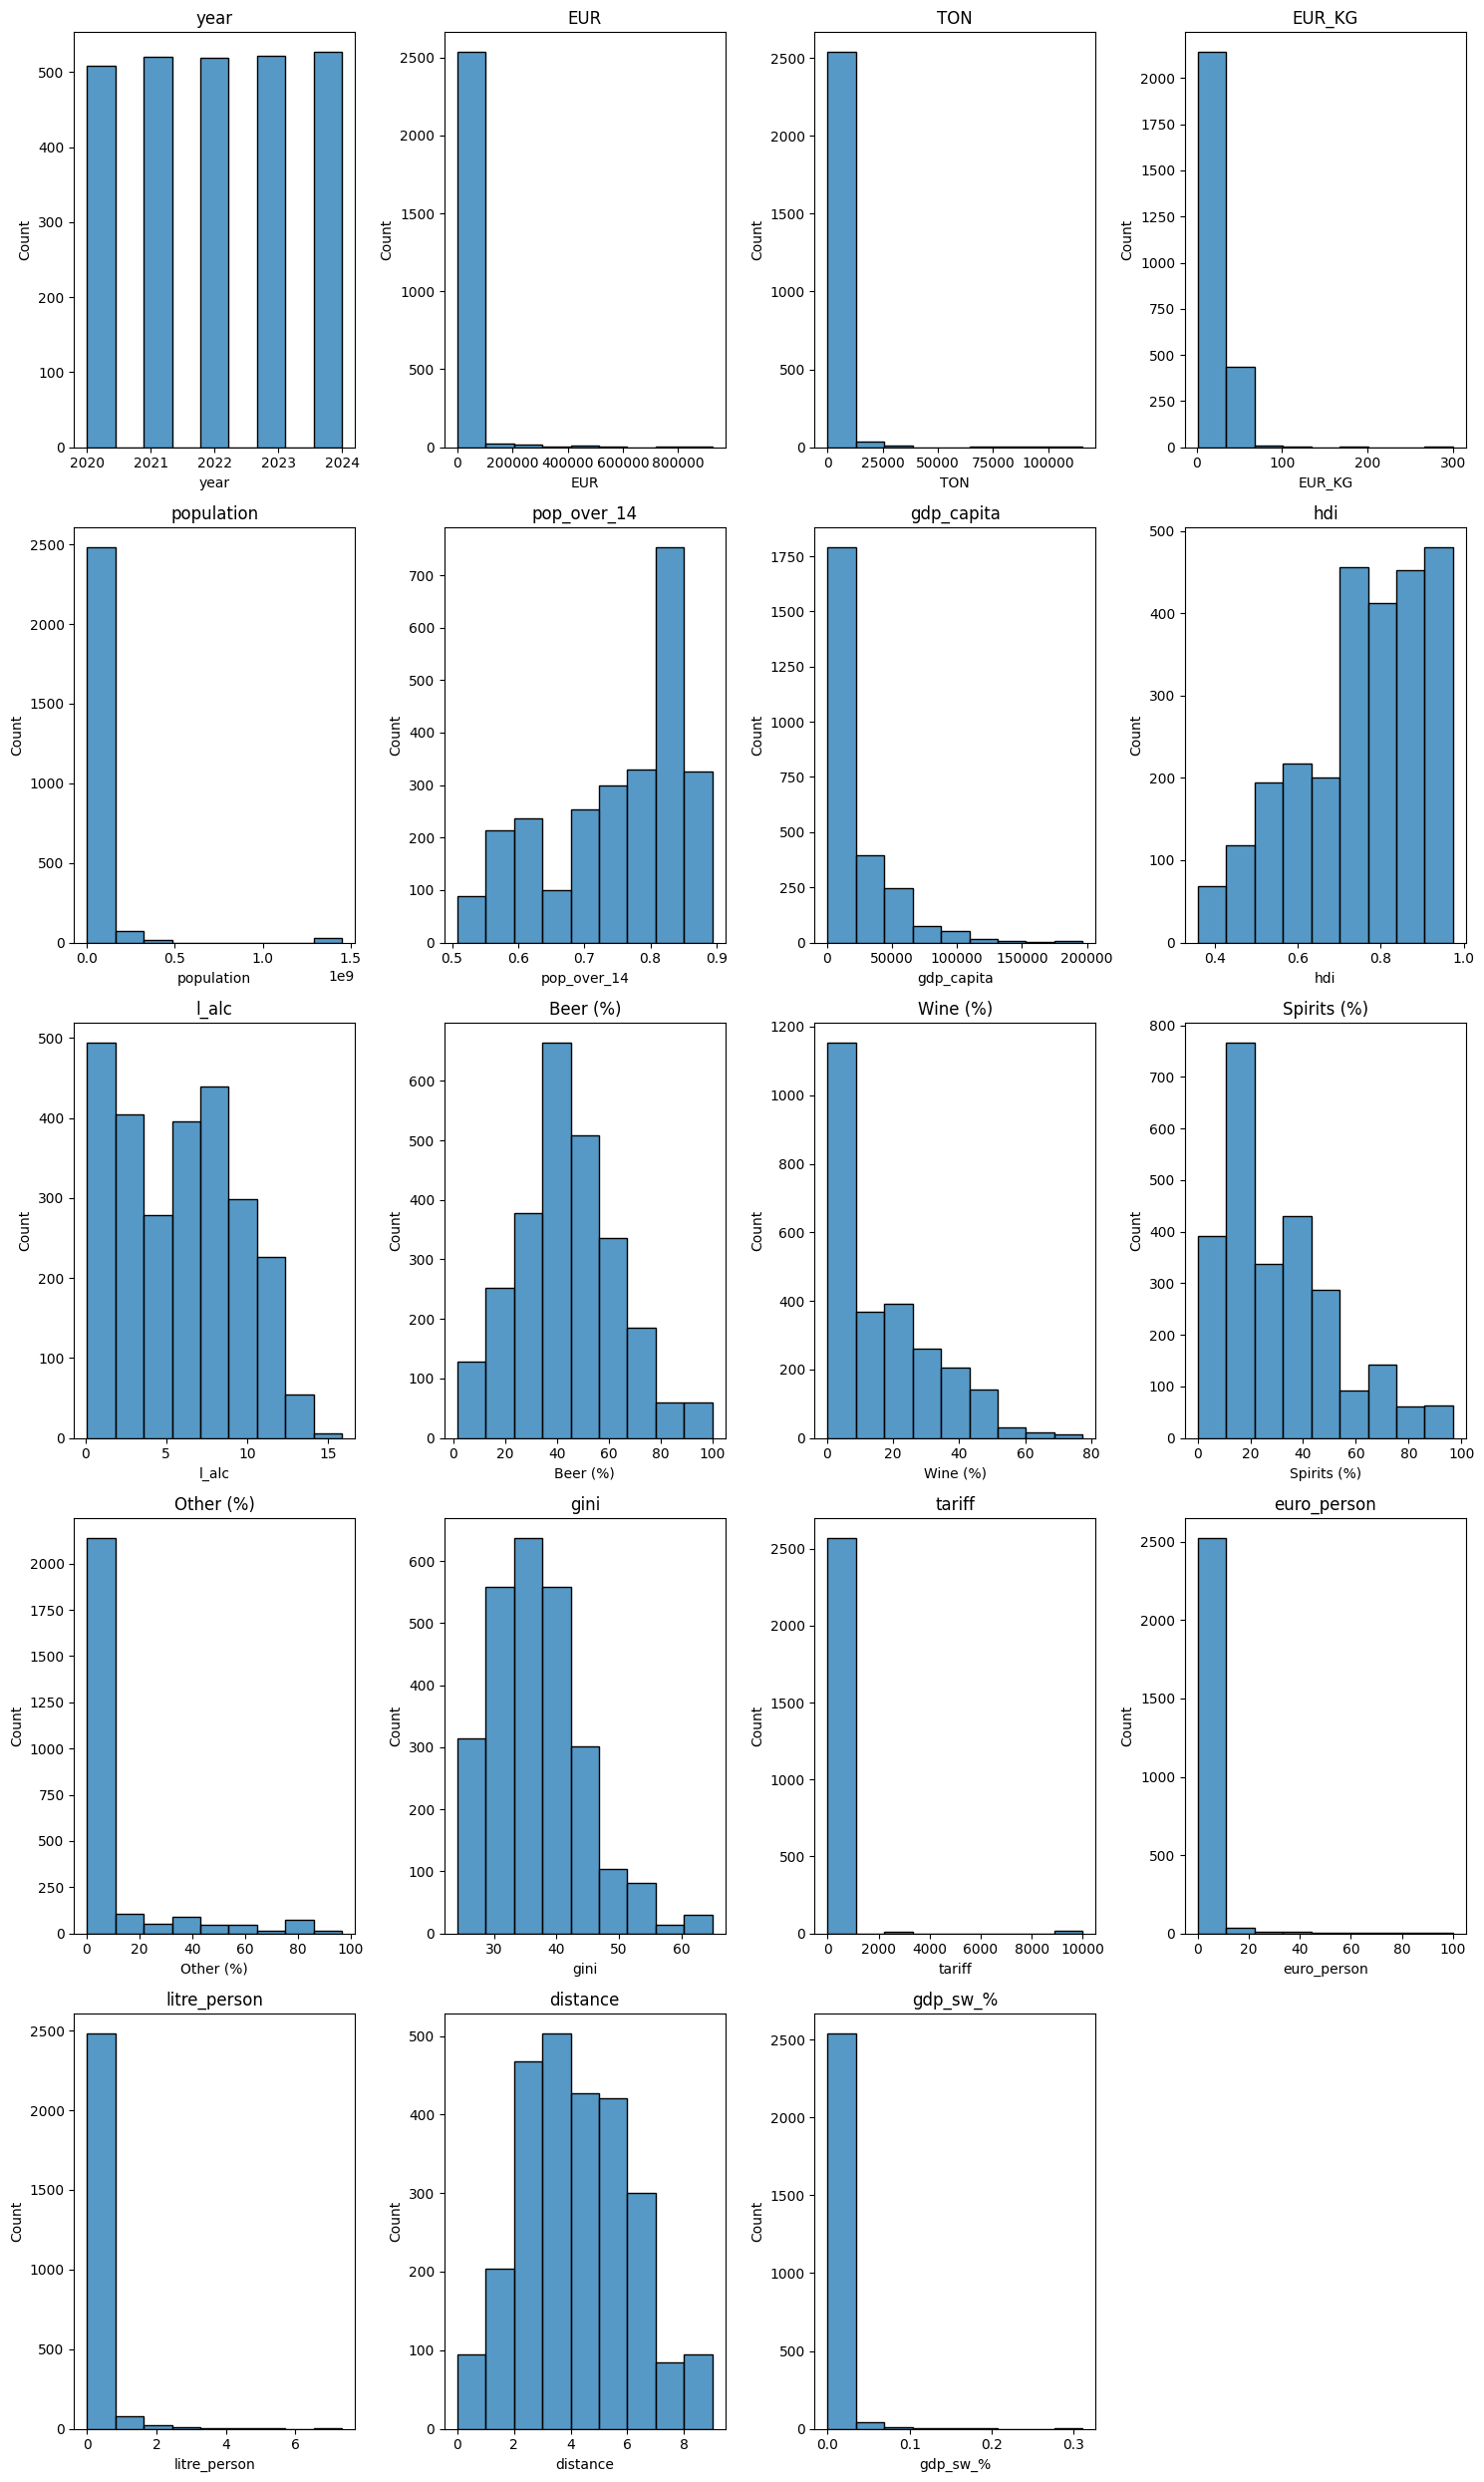

In [110]:
n_cols = 4
n_rows = -(-len(num_l) // n_cols)

plt.figure(figsize=(15, 5 * n_rows))  # Ajusta el tamaño

for idx, col in enumerate(num_l, 1):
    plt.subplot(n_rows, n_cols, idx)  # Crear subplot
    sns.histplot(data=df1, x=col, bins=9)
    plt.title(col)

plt.tight_layout()
plt.show()

###**4.3.2 | CATEGORIC**

In [111]:
cat_l

['country', 'TARIC', 'region', 'market_union']

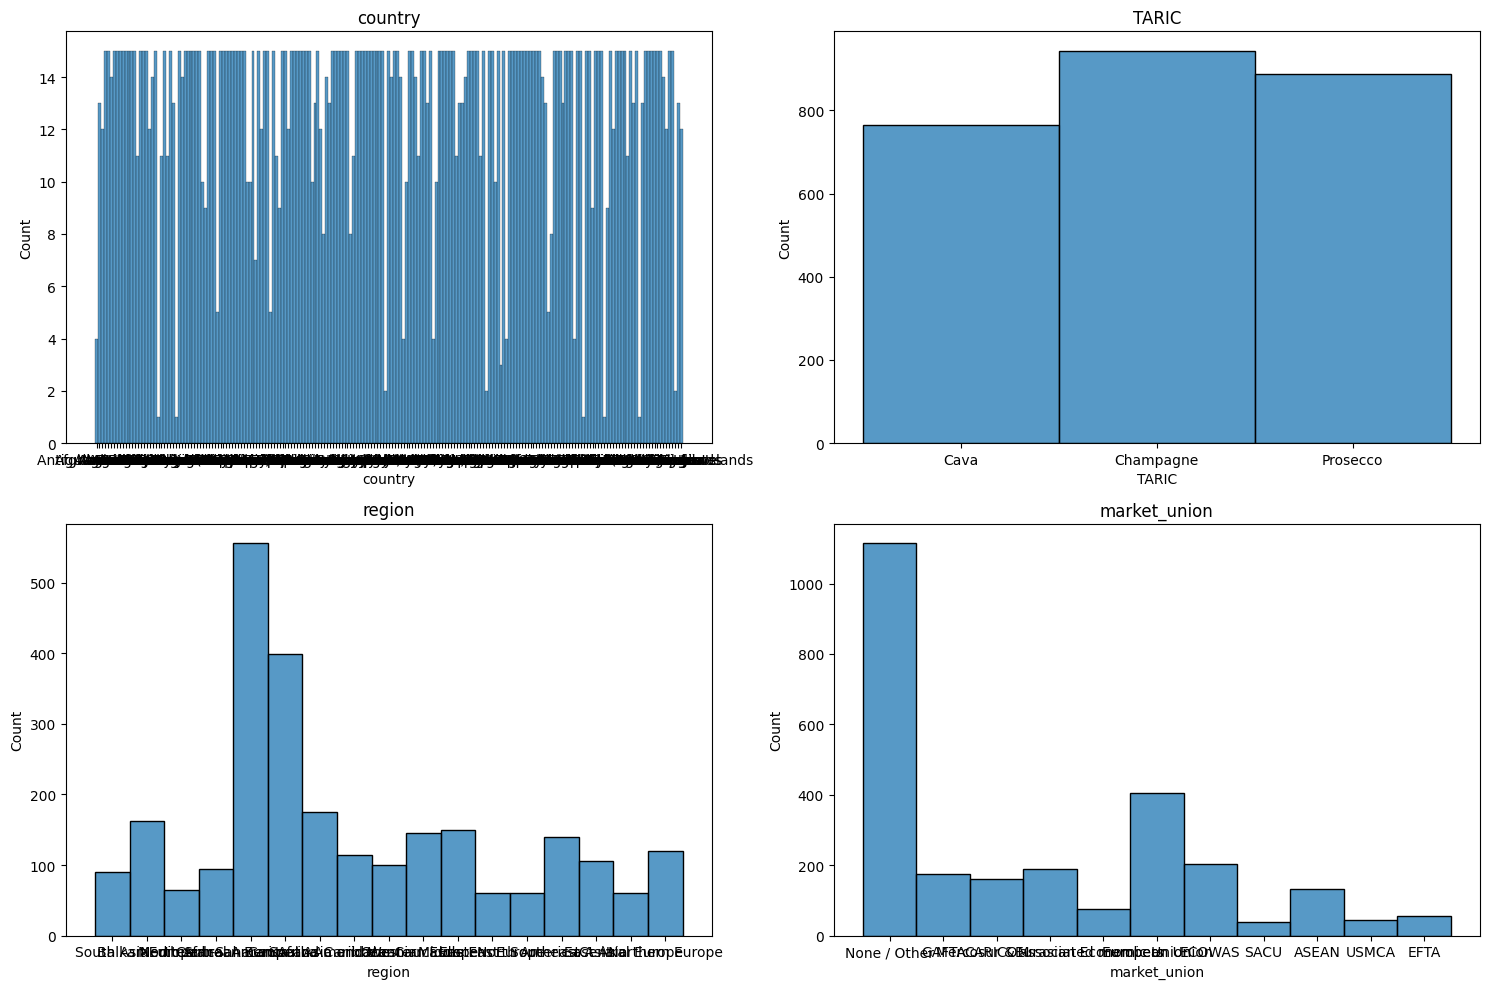

In [112]:
n_cols = 2
n_rows = -(-len(cat_l) // n_cols)

plt.figure(figsize=(15, 5 * n_rows))  # Ajusta el tamaño

for idx, col in enumerate(cat_l, 1):
    plt.subplot(n_rows, n_cols, idx)  # Crear subplot
    sns.histplot(data=df1, x=col, bins=9)
    plt.title(col)

plt.tight_layout()
plt.show()

##**4.4 | FEATURES RELATION ANALYSISIS** - TBD

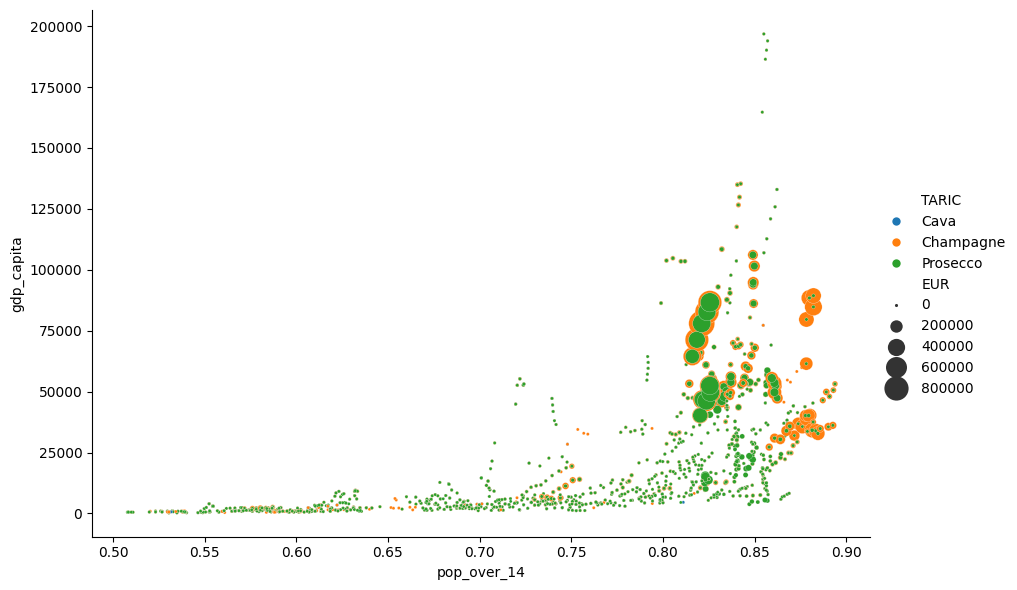

In [113]:
sns.relplot(
    data=df1,
    x='pop_over_14',
    y='gdp_capita',
    size='EUR',
    sizes=(5, 350),
    hue='TARIC',
    aspect=1.5,
    height=6
)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#**5 | OUTLIERS**

No outliers detected in the dataset.

#**6 | CLUSTERING DATASET**

##**6.1 | DATASET SPLITS**

###**6.1.1 | DATASET MEAN 2023-2024**

In [114]:
df_now = df1[df1['year']>=2023].groupby(['country', 'TARIC','region','market_union',],
                                         as_index=False).agg({
                                             'EUR': 'mean',
                                             'TON': 'mean',
                                             'EUR_KG': 'mean',
                                             'population':'mean',
                                             'pop_over_14':'mean',
                                             'gdp_capita':'mean',
                                             'hdi':'mean',
                                             'l_alc':'mean',
                                             'Beer (%)':'mean',
                                             'Wine (%)':'mean',
                                             'Spirits (%)':'mean',
                                             'Other (%)':'mean',
                                             'gini':'mean',
                                             'tariff':'mean',
                                             'euro_person':'mean',
                                             'litre_person':'mean',
                                             'distance':'mean',
                                             'gdp_sw_%':'mean',
})

In [115]:
df_now.head()

,country,TARIC,region,market_union,EUR,TON,EUR_KG,population,pop_over_14,gdp_capita,hdi,l_alc,Beer (%),Wine (%),Spirits (%),Other (%),gini,tariff,euro_person,litre_person,distance,gdp_sw_%
0,Albania,Cava,Balkan Europe,None / Other,14.375,4.000,4.3615,2768868.5,0.830845,8948.7345,0.7785,4.925,39.6,24.5,34.1,1.8,29.4,15.0,0.0060,0.0020,2.0,0.000059
1,Albania,Champagne,Balkan Europe,None / Other,1359.765,30.175,45.0085,2768868.5,0.830845,8948.7345,0.7785,4.925,39.6,24.5,34.1,1.8,29.4,15.0,0.5905,0.0130,2.0,0.005470
2,Albania,Prosecco,Balkan Europe,None / Other,524.400,109.344,4.8015,2768868.5,0.830845,8948.7345,0.7785,4.925,39.6,24.5,34.1,1.8,29.4,15.0,0.2280,0.0475,1.0,0.002129
3,Algeria,Cava,North Africa,GAFTA,0.000,0.000,NaN,46814308.0,0.689250,5579.1280,0.7490,0.600,53.5,32.7,13.8,0.1,27.6,30.0,0.0000,0.0000,1.0,0.000000
4,Algeria,Champagne,North Africa,GAFTA,43.970,1.865,23.4310,46489263.5,0.691430,5400.4705,0.7480,0.600,53.5,32.7,13.8,0.1,27.6,30.0,0.0015,0.0000,1.0,0.000017


* **POPULATION AMMENDS**

In [116]:
df_now['population'] = round(df_now['population'],0)

###**6.2.1 | DATASET 2020-2022**

In [117]:
df_pre = df1[df1['year']<=2022].groupby(['country', 'TARIC','region','market_union',],
                                         as_index=False).agg({
                                             'EUR': 'mean',
                                             'TON': 'mean',
                                             'EUR_KG': 'mean',
                                             'population':'mean',
                                             'pop_over_14':'mean',
                                             'gdp_capita':'mean',
                                             'hdi':'mean',
                                             'l_alc':'mean',
                                             'Beer (%)':'mean',
                                             'Wine (%)':'mean',
                                             'Spirits (%)':'mean',
                                             'Other (%)':'mean',
                                             'gini':'mean',
                                             'tariff':'mean',
                                             'euro_person':'mean',
                                             'litre_person':'mean',
                                             'distance':'mean',
                                             'gdp_sw_%':'mean',
})

In [118]:
df_pre.head(5)

,country,TARIC,region,market_union,EUR,TON,EUR_KG,population,pop_over_14,gdp_capita,hdi,l_alc,Beer (%),Wine (%),Spirits (%),Other (%),gini,tariff,euro_person,litre_person,distance,gdp_sw_%
0,Afghanistan,Cava,South Asia,None / Other,0.03,0.01,3.000,39068979.0,0.557760,516.664000,0.492,0.100000,6.1,4.4,89.1,0.4,29.4,9999.0,0.000,0.000000,4.0,0.000000
1,Afghanistan,Champagne,South Asia,None / Other,0.69,0.08,9.726,39534695.5,0.559340,436.363500,0.490,0.100000,6.1,4.4,89.1,0.4,29.4,9999.0,0.000,0.000000,4.0,0.000003
2,Afghanistan,Prosecco,South Asia,None / Other,0.48,0.05,9.600,39068979.0,0.557760,516.664000,0.492,0.100000,6.1,4.4,89.1,0.4,29.4,9999.0,0.000,0.000000,3.0,0.000002
3,Albania,Cava,Balkan Europe,None / Other,1.43,0.34,4.206,2777689.0,0.827780,6870.210000,0.789,4.750000,39.6,24.5,34.1,1.8,29.4,15.0,0.001,0.000000,2.0,0.000007
4,Albania,Champagne,Balkan Europe,None / Other,871.39,20.38,42.400,2809068.0,0.826297,6206.559667,0.791,4.633333,39.6,24.5,34.1,1.8,29.4,15.0,0.376,0.008667,2.0,0.004967


##**6.2 | DATASET DIFFERENCES**

In [119]:
df_diff = pd.DataFrame(df_now.set_index(['country', 'TARIC','region','market_union']) - df_pre.set_index(['country', 'TARIC','region','market_union'])).reset_index()

In [120]:
df_diff = df_diff.rename(columns={col: f'diff_{col}' for col in df_diff.select_dtypes('number').columns
                                 if col not in ['country', 'TARIC', 'region', 'market_union']})

###**6.2.2 | ROUNDS**

In [121]:
df_diff['diff_population'] = round(df_diff['diff_population'],0)
df_diff['diff_gdp_capita'] = round(df_diff['diff_gdp_capita'],2)
df_diff['diff_l_alc'] = round(df_diff['diff_l_alc'],3)
df_diff['diff_Beer (%)'] = round(df_diff['diff_Beer (%)'],5)
df_diff['diff_Wine (%)'] = round(df_diff['diff_Wine (%)'],5)
df_diff['diff_Spirits (%)'] = round(df_diff['diff_Spirits (%)'],5)
df_diff['diff_Other (%)'] = round(df_diff['diff_Other (%)'],5)
df_diff['diff_gini'] = round(df_diff['diff_gini'],5)
df_diff['diff_euro_person'] = round(df_diff['diff_euro_person'],5)
df_diff['diff_litre_person'] = round(df_diff['diff_litre_person'],5)
df_diff['diff_gdp_sw_%'] = round(df_diff['diff_gdp_sw_%'],5)

df_diff['diff_EUR'] = round(df_diff['diff_EUR'],3)
df_diff['diff_TON'] = round(df_diff['diff_TON'],3)
df_diff['diff_EUR_KG'] = round(df_diff['diff_EUR_KG'],4)

In [122]:
df_diff.head(10)

,country,TARIC,region,market_union,diff_EUR,diff_TON,diff_EUR_KG,diff_population,diff_pop_over_14,diff_gdp_capita,diff_hdi,diff_l_alc,diff_Beer (%),diff_Wine (%),diff_Spirits (%),diff_Other (%),diff_gini,diff_tariff,diff_euro_person,diff_litre_person,diff_distance,diff_gdp_sw_%
0,Afghanistan,Cava,South Asia,None / Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Champagne,South Asia,None / Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,Prosecco,South Asia,None / Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,Cava,Balkan Europe,None / Other,12.945,3.660,0.1555,-8821.0,0.003065,2078.52,-0.0105,0.175,0.0,0.0,0.0,0.0,0.0,0.0,0.00500,0.00200,0.0,0.00005
4,Albania,Champagne,Balkan Europe,None / Other,488.375,9.795,2.6085,-40200.0,0.004548,2742.17,-0.0125,0.292,0.0,0.0,0.0,0.0,0.0,0.0,0.21450,0.00433,0.0,0.00050
5,Albania,Prosecco,Balkan Europe,None / Other,314.417,63.561,0.1495,-40200.0,0.004548,2742.17,-0.0125,0.292,0.0,0.0,0.0,0.0,0.0,0.0,0.13733,0.02783,0.0,0.00094
6,Algeria,Cava,North Africa,GAFTA,-21.450,-3.660,NaN,2053209.0,-0.001580,1409.14,0.0190,0.000,0.0,0.0,0.0,0.0,0.0,0.0,-0.00100,0.00000,0.0,-0.00001
7,Algeria,Champagne,North Africa,GAFTA,-191.307,-7.412,-1.8037,1729071.0,0.000097,1097.34,0.0090,0.000,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.00583,0.00000,0.0,-0.00011
8,Algeria,Prosecco,North Africa,GAFTA,-6.475,-0.929,7.5218,1729071.0,0.000097,1097.34,0.0090,0.000,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.00033,0.00000,0.0,-0.00000
9,Andorra,Cava,Mediterranean Europe,None / Other,235.742,27.024,0.7557,2914.0,0.010003,4490.92,0.0365,0.000,0.0,0.0,0.0,0.0,0.0,0.0,2.95433,0.31600,0.0,0.00442


##**6.3 | DATASET MERGE**

In [123]:
df2 = pd.merge(
    df_now,
    df_diff,
    on=['country', 'TARIC', 'region', 'market_union'],
    how='left')

In [124]:
col_to_drop=['diff_tariff','diff_distance','diff_gini','diff_Other (%)','diff_Spirits (%)','diff_Wine (%)','diff_Beer (%)']

In [125]:
df2 = df2.drop(columns=col_to_drop)

In [126]:
df2.head()

,country,TARIC,region,market_union,EUR,TON,EUR_KG,population,pop_over_14,gdp_capita,hdi,l_alc,Beer (%),Wine (%),Spirits (%),Other (%),gini,tariff,euro_person,litre_person,distance,gdp_sw_%,diff_EUR,diff_TON,diff_EUR_KG,diff_population,diff_pop_over_14,diff_gdp_capita,diff_hdi,diff_l_alc,diff_euro_person,diff_litre_person,diff_gdp_sw_%
0,Albania,Cava,Balkan Europe,None / Other,14.375,4.000,4.3615,2768868.0,0.830845,8948.7345,0.7785,4.925,39.6,24.5,34.1,1.8,29.4,15.0,0.0060,0.0020,2.0,0.000059,12.945,3.660,0.1555,-8821.0,0.003065,2078.52,-0.0105,0.175,0.00500,0.00200,0.00005
1,Albania,Champagne,Balkan Europe,None / Other,1359.765,30.175,45.0085,2768868.0,0.830845,8948.7345,0.7785,4.925,39.6,24.5,34.1,1.8,29.4,15.0,0.5905,0.0130,2.0,0.005470,488.375,9.795,2.6085,-40200.0,0.004548,2742.17,-0.0125,0.292,0.21450,0.00433,0.00050
2,Albania,Prosecco,Balkan Europe,None / Other,524.400,109.344,4.8015,2768868.0,0.830845,8948.7345,0.7785,4.925,39.6,24.5,34.1,1.8,29.4,15.0,0.2280,0.0475,1.0,0.002129,314.417,63.561,0.1495,-40200.0,0.004548,2742.17,-0.0125,0.292,0.13733,0.02783,0.00094
3,Algeria,Cava,North Africa,GAFTA,0.000,0.000,NaN,46814308.0,0.689250,5579.1280,0.7490,0.600,53.5,32.7,13.8,0.1,27.6,30.0,0.0000,0.0000,1.0,0.000000,-21.450,-3.660,NaN,2053209.0,-0.001580,1409.14,0.0190,0.000,-0.00100,0.00000,-0.00001
4,Algeria,Champagne,North Africa,GAFTA,43.970,1.865,23.4310,46489264.0,0.691430,5400.4705,0.7480,0.600,53.5,32.7,13.8,0.1,27.6,30.0,0.0015,0.0000,1.0,0.000017,-191.307,-7.412,-1.8037,1729071.0,0.000097,1097.34,0.0090,0.000,-0.00583,0.00000,-0.00011


##**6.4 | EDA**

* **NUMERIC**

In [127]:
num_l, cat_l, boo_l = variable_split(df2)

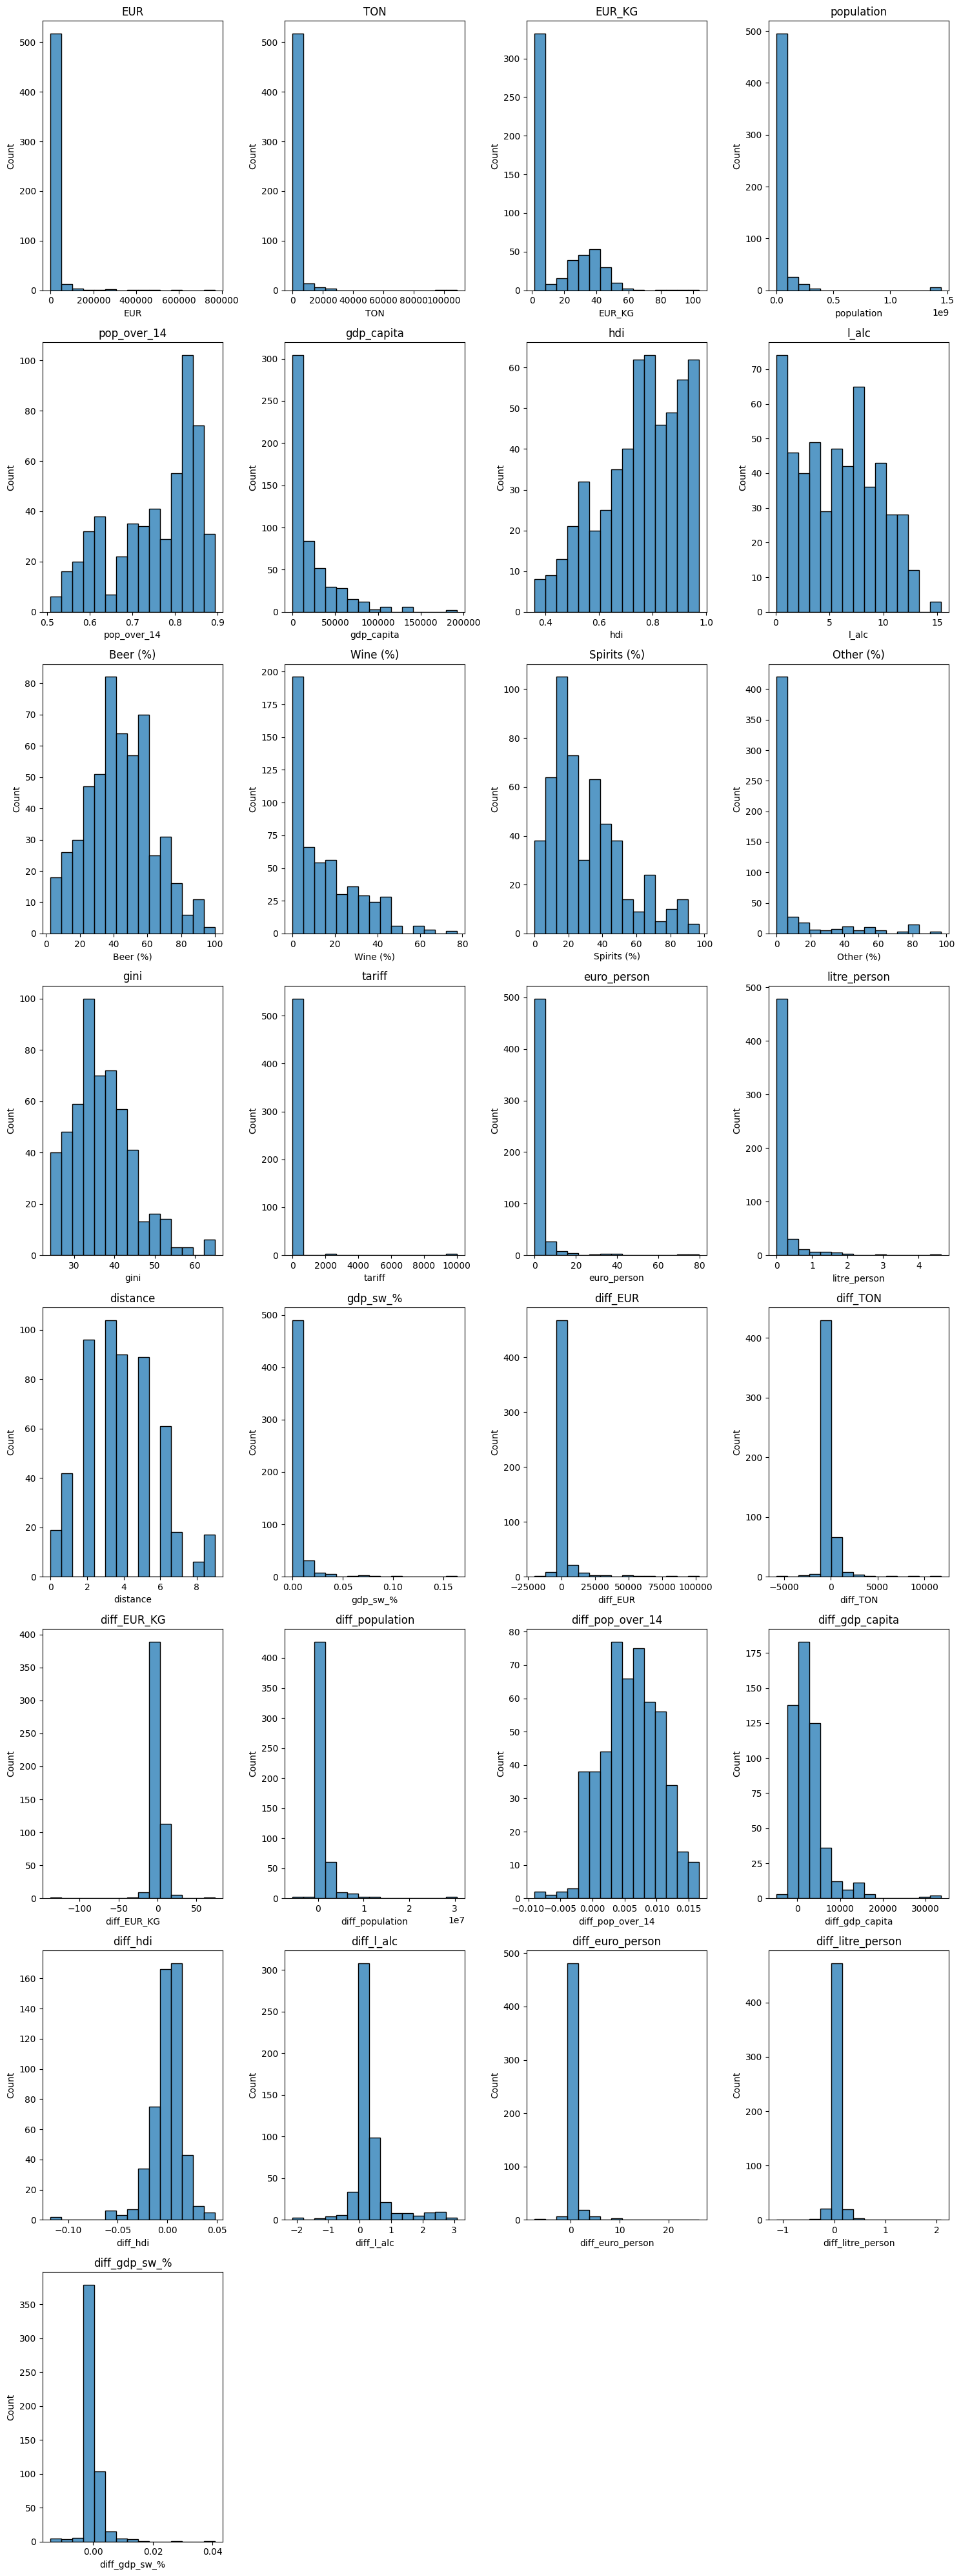

In [128]:
n_cols = 4
n_rows = -(-len(num_l) // n_cols)

plt.figure(figsize=(15, 5 * n_rows))  # Ajusta el tamaño

for idx, col in enumerate(num_l, 1):
    plt.subplot(n_rows, n_cols, idx)  # Crear subplot
    sns.histplot(data=df2, x=col, bins=15)
    plt.title(col)

plt.tight_layout()
plt.show()

#**7 | PICKLE**

In [ ]:
#PICKLES
path_df1 = ''
path_df2 = ''

In [ ]:
df1.to_csv(path_df1, index=False)

In [ ]:
df2.to_csv(path_df2, index=False)

In [131]:
df1.head()

,country,TARIC,year,region,market_union,EUR,TON,EUR_KG,population,pop_over_14,gdp_capita,hdi,l_alc,Beer (%),Wine (%),Spirits (%),Other (%),gini,tariff,euro_person,litre_person,distance,gdp_sw_%
0,Afghanistan,Cava,2020,South Asia,None / Other,0.03,0.01,3.000,39068979.0,0.55776,516.664,0.492,0.10,6.1,4.4,89.1,0.4,29.4,9999.0,0.000,0.0,4,0.000000
1,Afghanistan,Champagne,2020,South Asia,None / Other,1.27,0.15,8.452,39068979.0,0.55776,516.664,0.492,0.10,6.1,4.4,89.1,0.4,29.4,9999.0,0.000,0.0,4,0.000006
2,Afghanistan,Champagne,2021,South Asia,None / Other,0.11,0.01,11.000,40000412.0,0.56092,356.063,0.488,0.10,6.1,4.4,89.1,0.4,29.4,9999.0,0.000,0.0,4,0.000001
3,Afghanistan,Prosecco,2020,South Asia,None / Other,0.48,0.05,9.600,39068979.0,0.55776,516.664,0.492,0.10,6.1,4.4,89.1,0.4,29.4,9999.0,0.000,0.0,3,0.000002
4,Albania,Cava,2022,Balkan Europe,None / Other,1.43,0.34,4.206,2777689.0,0.82778,6870.210,0.789,4.75,39.6,24.5,34.1,1.8,29.4,15.0,0.001,0.0,2,0.000007
